In [1]:
#importing the key libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
#reading in the player statistics data
data = pd.read_csv('C:\\Users\\WIN\\Desktop\\Data Science labs\\Capstone Project\\Data\\combined.csv')
print(data)

       Year              Player            Players Team  Games  Kicks  Marks  \
0      1999       Ratten, Brett       Brett Ratten   CA     26  13.46   2.62   
1      1999     Crawford, Shane     Shane Crawford   HW     22  17.64   4.64   
2      1999    Cresswell, Daryn    Daryn Cresswell   SY     23  15.30   4.26   
3      1999      Bradley, Craig      Craig Bradley   CA     26  16.54   3.69   
4      1999         Bell, Peter         Peter Bell   KA     25  17.08   3.84   
...     ...                 ...                ...  ...    ...    ...    ...   
12736  2019   McInerney, Justin   Justin McInerney   SY      1   1.00   0.00   
12737  2019  Vickers-Willis, Ed  Ed Vickers-Willis   NM      1   0.00   0.00   
12738  2019       Sheridan, Tom       Tom Sheridan   GW      1   0.00   1.00   
12739  2019        Ward, Callan        Callan Ward   GW      1   1.00   0.00   
12740  2019         Mutch, Kobe         Kobe Mutch   ES      1   0.00   0.00   

       Handballs Disposals  Goals  ... 

In [3]:
# Finding variables in the dataset that have null values
data.isnull().sum()

Year                       0
Player                     0
Players                    0
Team                       0
Games                      0
Kicks                      0
Marks                      0
Handballs                  0
Disposals                  0
Goals                      0
Behinds                    0
Hit Outs                   0
Tackles                    0
Rebound 50s                0
Inside 50s                 0
Clearances                 0
Clangers                   0
Free Kicks For             0
Free Kicks Against         0
Brownlow Votes             0
Contested Possessions      0
Uncontested Possessions    0
Contested Marks            0
Marks Inside 50            0
One Percenters             0
Bounces                    0
Goal Assists               0
Position                   0
Forward Player             0
Goal Kicker                0
dtype: int64

In [5]:
# Converting variable goal assists to float.
for x in data['Goal Assists'].unique():
    try:
        float(x)
    except:
        print([x])

['\xa0']


In [6]:
# Determining the variables that are numerical and categorical
data['Goal Assists'] = data['Goal Assists'].apply(lambda x : np.nan if x == "\xa0" else x).astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     12741 non-null  int64  
 1   Player                   12741 non-null  object 
 2   Players                  12741 non-null  object 
 3   Team                     12741 non-null  object 
 4   Games                    12741 non-null  int64  
 5   Kicks                    12741 non-null  float64
 6   Marks                    12741 non-null  float64
 7   Handballs                12741 non-null  float64
 8   Disposals                12741 non-null  object 
 9   Goals                    12741 non-null  float64
 10  Behinds                  12741 non-null  float64
 11  Hit Outs                 12741 non-null  float64
 12  Tackles                  12741 non-null  float64
 13  Rebound 50s              12741 non-null  float64
 14  Inside 50s            

In [7]:
# Converting variable Disposals to float.
for x in data['Disposals'].unique():
    try:
        float(x)
    except:
        print([x])

['\xa0']


In [8]:
data['Disposals'] = data['Disposals'].apply(lambda x : np.nan if x == "\xa0" else x).astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     12741 non-null  int64  
 1   Player                   12741 non-null  object 
 2   Players                  12741 non-null  object 
 3   Team                     12741 non-null  object 
 4   Games                    12741 non-null  int64  
 5   Kicks                    12741 non-null  float64
 6   Marks                    12741 non-null  float64
 7   Handballs                12741 non-null  float64
 8   Disposals                12730 non-null  float64
 9   Goals                    12741 non-null  float64
 10  Behinds                  12741 non-null  float64
 11  Hit Outs                 12741 non-null  float64
 12  Tackles                  12741 non-null  float64
 13  Rebound 50s              12741 non-null  float64
 14  Inside 50s            

In [9]:
# rows and columns of the dataset
data.shape

(12741, 30)

In [10]:
#Headings of the dataset
data.head(0)

,Year,Player,Players,Team,Games,Kicks,Marks,Handballs,Disposals,Goals,...,Contested Possessions,Uncontested Possessions,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,Position,Forward Player,Goal Kicker


In [11]:
#Presentation of the dataset
data.tail

<bound method NDFrame.tail of        Year              Player            Players Team  Games  Kicks  Marks  \
0      1999       Ratten, Brett       Brett Ratten   CA     26  13.46   2.62   
1      1999     Crawford, Shane     Shane Crawford   HW     22  17.64   4.64   
2      1999    Cresswell, Daryn    Daryn Cresswell   SY     23  15.30   4.26   
3      1999      Bradley, Craig      Craig Bradley   CA     26  16.54   3.69   
4      1999         Bell, Peter         Peter Bell   KA     25  17.08   3.84   
...     ...                 ...                ...  ...    ...    ...    ...   
12736  2019   McInerney, Justin   Justin McInerney   SY      1   1.00   0.00   
12737  2019  Vickers-Willis, Ed  Ed Vickers-Willis   NM      1   0.00   0.00   
12738  2019       Sheridan, Tom       Tom Sheridan   GW      1   0.00   1.00   
12739  2019        Ward, Callan        Callan Ward   GW      1   1.00   0.00   
12740  2019         Mutch, Kobe         Kobe Mutch   ES      1   0.00   0.00   

       Ha

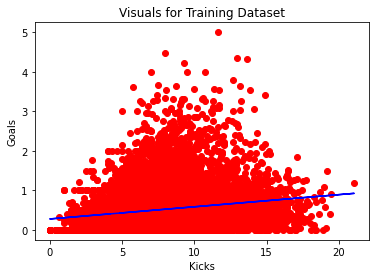

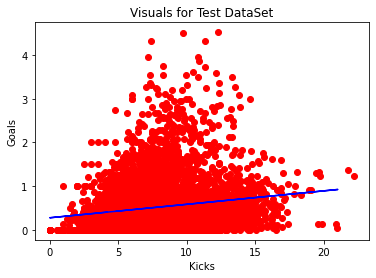

In [12]:
Goals=data['Goals']
Kicks=data['Kicks']

x = np.array(Kicks).reshape(-1, 1)
y = np.array(Goals)

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=0)


#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

#Predicting the prices
pred = regressor.predict(xtest)

#Visualizing the training Test Results 
plt.scatter(xtrain, ytrain, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Kicks")
plt.ylabel("Goals")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtest, ytest, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Kicks")
plt.ylabel("Goals")
plt.show()


In [13]:
#Determine variable types
data.dtypes

Year                         int64
Player                      object
Players                     object
Team                        object
Games                        int64
Kicks                      float64
Marks                      float64
Handballs                  float64
Disposals                  float64
Goals                      float64
Behinds                    float64
Hit Outs                   float64
Tackles                    float64
Rebound 50s                float64
Inside 50s                 float64
Clearances                 float64
Clangers                   float64
Free Kicks For             float64
Free Kicks Against         float64
Brownlow Votes             float64
Contested Possessions      float64
Uncontested Possessions    float64
Contested Marks            float64
Marks Inside 50            float64
One Percenters             float64
Bounces                    float64
Goal Assists               float64
Position                    object
Forward Player      

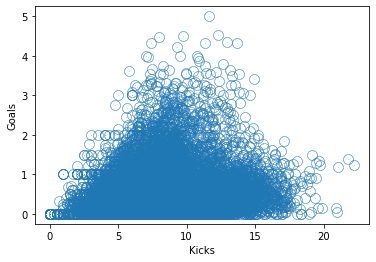

In [14]:
#Scatterplot between goals and kicks
data.plot.scatter('Kicks','Goals', s=0.4, alpha=0.8, linewidths=10)

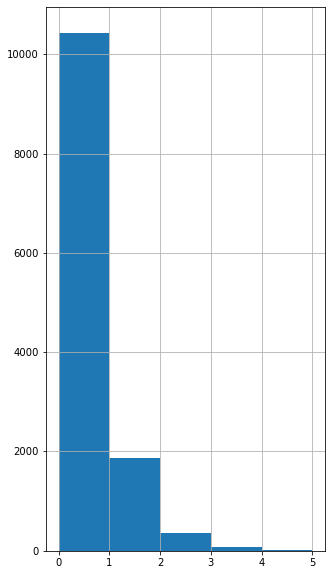

In [15]:
#Histogram for goals
data['Goals'].hist(bins=5, figsize=(5,10))

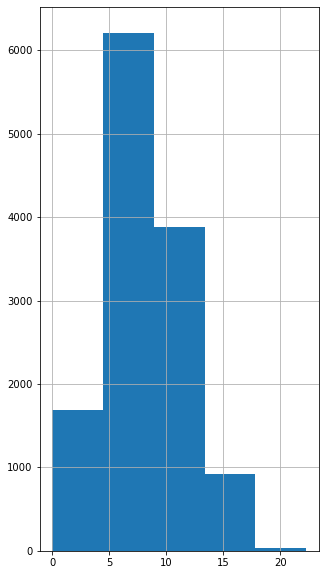

In [16]:
#Histogram for Kicks
data['Kicks'].hist(bins=5, figsize=(5,10))

In [17]:
#Correlations between all variables in the dataset
data.corr()

,Year,Games,Kicks,Marks,Handballs,Disposals,Goals,Behinds,Hit Outs,Tackles,...,Brownlow Votes,Contested Possessions,Uncontested Possessions,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,Forward Player,Goal Kicker
Year,1.000000,-0.038483,0.112419,0.095532,0.299313,0.227612,-0.032677,-0.011888,0.050263,0.404642,...,-0.009719,0.178369,0.220371,-0.021557,-0.036872,0.195674,-0.149421,0.025397,0.351530,-0.014847
Games,-0.038483,1.000000,0.569789,0.440739,0.387423,0.553763,0.230789,0.190396,0.009073,0.253516,...,0.397462,0.497351,0.473880,0.216110,0.152043,0.139583,0.273355,0.283274,0.018263,0.100574
Kicks,0.112419,0.569789,1.000000,0.625584,0.522239,0.889731,0.180225,0.203683,-0.220656,0.323347,...,0.535943,0.617741,0.860793,0.052465,0.074798,0.012390,0.417858,0.339358,-0.011059,0.059694
Marks,0.095532,0.440739,0.625584,1.000000,0.257778,0.517588,0.263325,0.228570,-0.093394,-0.000197,...,0.263192,0.244004,0.577219,0.456818,0.337499,0.245847,0.207970,0.156112,-0.020162,0.207743
Handballs,0.299313,0.387423,0.522239,0.257778,1.000000,0.852754,-0.121132,-0.084577,-0.031470,0.600000,...,0.454356,0.757258,0.763823,-0.159507,-0.193704,0.008694,0.182049,0.240778,0.016667,-0.144328
Disposals,0.227612,0.553763,0.889731,0.517588,0.852754,1.000000,0.043703,0.077480,-0.152266,0.516755,...,0.570893,0.781025,0.933900,-0.055342,-0.059561,0.010015,0.352228,0.336403,0.002002,-0.041102
Goals,-0.032677,0.230789,0.180225,0.263325,-0.121132,0.043703,1.000000,0.763048,-0.029669,-0.004224,...,0.305271,0.184446,-0.037972,0.457267,0.868432,-0.273236,-0.004655,0.472806,0.244781,0.647691
Behinds,-0.011888,0.190396,0.203683,0.228570,-0.084577,0.077480,0.763048,1.000000,-0.046581,0.029474,...,0.278571,0.195690,0.004483,0.375310,0.780371,-0.296575,0.018398,0.460020,0.240230,0.473411
Hit Outs,0.050263,0.009073,-0.220656,-0.093394,-0.031470,-0.152266,-0.029669,-0.046581,1.000000,-0.001373,...,0.010338,0.072038,-0.249508,0.238379,0.022753,0.097894,-0.166058,-0.068586,-0.061761,-0.034523
Tackles,0.404642,0.253516,0.323347,-0.000197,0.600000,0.516755,-0.004224,0.029474,-0.001373,1.000000,...,0.302451,0.592280,0.392521,-0.183892,-0.098038,-0.032816,0.037605,0.257737,0.130543,-0.078153


In [18]:
#importing seaborn library
import seaborn as sns

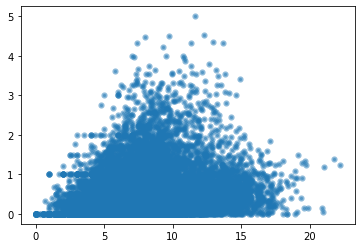

In [19]:
#Scatterplot between kicks and goals.
plt.scatter(data['Kicks'], data['Goals'], s = 10, linewidths = 3, alpha = 0.5);

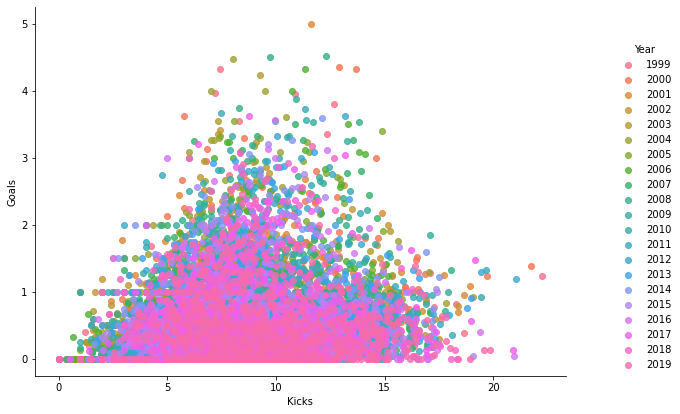

In [20]:
#seaborn plots for kicks and goals between 1999 and 2019. 
sns.lmplot(x = 'Kicks', y = 'Goals', hue = 'Year', data = data, fit_reg = False);
plt.gcf().set_size_inches(10, 6);

In [21]:
#Extracting goals and player variables from the dataset
data1 = data[['Goals','Player']]
data1.head()

,Goals,Player
0,0.54,"Ratten, Brett"
1,0.64,"Crawford, Shane"
2,0.78,"Cresswell, Daryn"
3,0.35,"Bradley, Craig"
4,1.28,"Bell, Peter"


In [22]:
# Grouping by how many times a players appears in the dataset
data1_group = data.groupby('Player')
data1_group.size()

Player
Abbott, Ryan          2
Ablett, Gary         18
Ablett, Luke          8
Ablett, Nathan        4
Abraham, Winston      3
                     ..
de Boer, Matt        11
de Goey, Jordan       5
van Berlo, Jay        4
van Berlo, Nathan    11
van Unen, Dylan       1
Length: 2333, dtype: int64

In [23]:
#Sorting players by total goals kicked
Goals_totals = data1_group.sum()
Goals_totals.sort_values(by='Goals').head()

,Year,Games,Kicks,Marks,Handballs,Disposals,Goals,Behinds,Hit Outs,Tackles,...,Brownlow Votes,Contested Possessions,Uncontested Possessions,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,Forward Player,Goal Kicker
Player,,,,,,,,,,,,,,,,,,,,,
"Lee, Brendan",2012,2,9.50,4.50,8.50,18.00,0.0,0.00,0.0,4.0,...,0.0,8.50,11.00,0.00,0.00,1.5,0.00,0.50,0,0
"Jones, Jordan",2010,2,5.50,4.00,5.00,10.50,0.0,0.00,0.0,1.0,...,0.0,5.00,6.00,0.50,0.00,2.0,0.00,0.00,0,0
"Jolly, Hayden",2011,6,7.33,3.33,9.00,16.33,0.0,0.33,0.0,1.5,...,0.0,4.83,11.67,0.33,0.00,1.0,0.33,0.33,0,0
"Jolley, Ben",2006,4,3.50,4.00,7.25,10.75,0.0,0.00,0.0,3.5,...,0.0,3.75,6.75,0.25,0.25,1.0,0.00,0.00,0,0
"Jok, Tom",2019,1,6.00,5.00,6.00,12.00,0.0,0.00,0.0,3.0,...,0.0,5.00,7.00,1.00,0.00,1.0,0.00,0.00,0,0


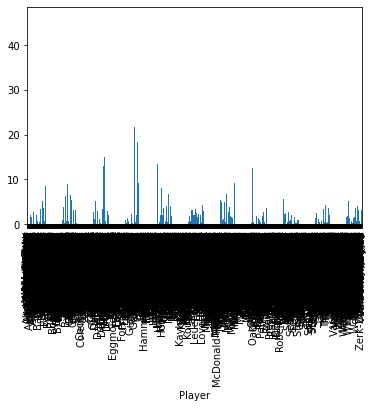

In [24]:
#Plot of total goals kicked by each player
my_plot = Goals_totals['Goals'].plot(kind='bar')

In [25]:
#Working out top 5 goal kickers from 1999-2019
Goals_totals = data1_group.sum()
top_5 = Goals_totals.sort_values(by='Goals', ascending=False).head()

Text(0.5, 1.0, 'Top 5 Goal Kickers')

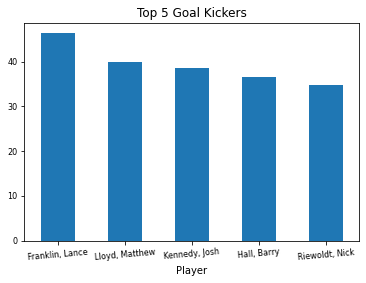

In [26]:
#Bar graph of top 5 goal kickers from 1999-2019
#top_5.plot(x="Player", y="Goals", kind="bar", rot=5, fontsize=8)
my_plot = top_5['Goals'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Goal Kickers")

Text(0.5, 1.0, 'Top 5 Game Players')

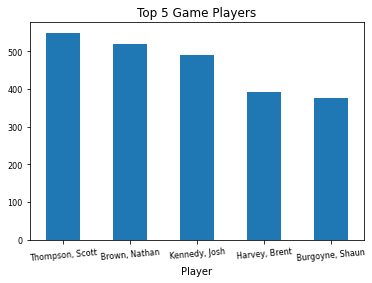

In [27]:
#Bar graph of top 5 players who have played the most games from 1999-2019
Games_totals = data1_group.sum()
top_5 = Games_totals.sort_values(by='Games', ascending=False).head()
#top_5.plot(x="Player", y="Goals", kind="bar", rot=5, fontsize=8)
my_plot = top_5['Games'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Game Players")

Text(0.5, 1.0, 'Top 5 Brownlow Votes')

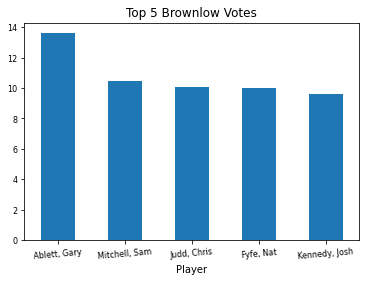

In [28]:
#Bar graph of top 5 players who have obtained the most brownlow votes from 1999-2019
Brownlow_totals = data1_group.sum()
top_5 = Games_totals.sort_values(by='Brownlow Votes', ascending=False).head()
#top_5.plot(x="Player", y="Goals", kind="bar", rot=5, fontsize=8)
my_plot = top_5['Brownlow Votes'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Brownlow Votes")

Text(0.5, 1.0, 'Top 5 Kicks')

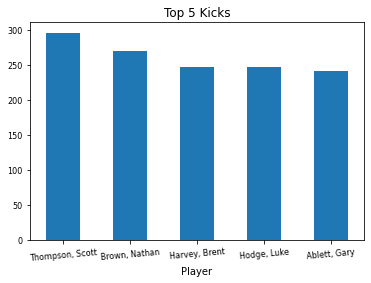

In [29]:
#Bar graph of top 5 players who have had the most kicks from 1999-2019
Kicks_totals = data1_group.sum()
top_5 = Kicks_totals.sort_values(by='Kicks', ascending=False).head()
#top_5.plot(x="Player", y="Goals", kind="bar", rot=5, fontsize=8)
my_plot = top_5['Kicks'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Kicks")

Text(0.5, 1.0, 'Top 5 Marks')

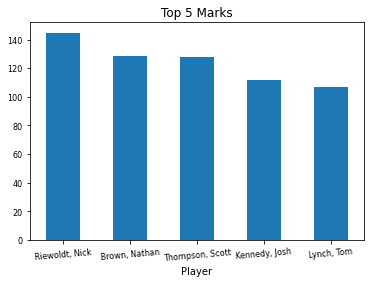

In [30]:
#Bar graph of top 5 players who have had the most marks from 1999-2019
Marks_totals = data1_group.sum()
top_5 = Marks_totals.sort_values(by='Marks', ascending=False).head()
#top_5.plot(x="Player", y="Goals", kind="bar", rot=5, fontsize=8)
my_plot = top_5['Marks'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Marks")

Text(0.5, 1.0, 'Top 5 handballers')

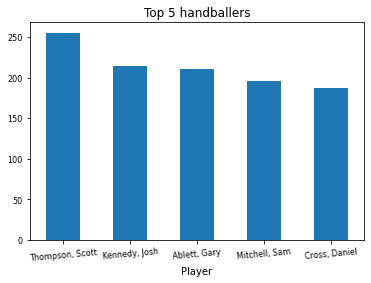

In [31]:
#Bar graph of top 5 players who have had the most handballs from 1999-2019
Handballs_totals = data1_group.sum()
top_5 = Handballs_totals.sort_values(by='Handballs', ascending=False).head()
#top_5.plot(x="Player", y="Goals", kind="bar", rot=5, fontsize=8)
my_plot = top_5['Handballs'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 handballers")

In [32]:
# Converting variable disposals to float.
for x in data['Disposals'].unique():
    try:
        float(x)
    except:
        print([x])

In [33]:
data['Disposals'] = data['Disposals'].apply(lambda x : np.nan if x == "\xa0" else x).astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     12741 non-null  int64  
 1   Player                   12741 non-null  object 
 2   Players                  12741 non-null  object 
 3   Team                     12741 non-null  object 
 4   Games                    12741 non-null  int64  
 5   Kicks                    12741 non-null  float64
 6   Marks                    12741 non-null  float64
 7   Handballs                12741 non-null  float64
 8   Disposals                12730 non-null  float64
 9   Goals                    12741 non-null  float64
 10  Behinds                  12741 non-null  float64
 11  Hit Outs                 12741 non-null  float64
 12  Tackles                  12741 non-null  float64
 13  Rebound 50s              12741 non-null  float64
 14  Inside 50s            

Text(0.5, 1.0, 'Top 5 Disposals')

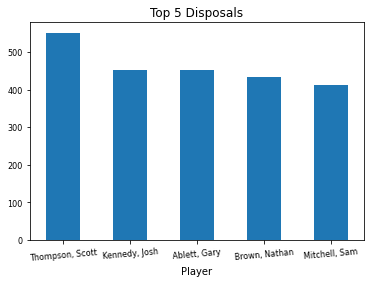

In [34]:
#Bar graph of top 5 players who have had the most disposals from 1999-2019
data1_group = data.groupby('Player')
Disposals_totals = data1_group.sum()
top_5 = Disposals_totals.sort_values(by='Disposals', ascending=False).head()
#top_5.plot(x="Player", y="Goals", kind="bar", rot=5, fontsize=8)
my_plot = top_5['Disposals'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Disposals")

Text(0.5, 1.0, 'Top 5 Behinds')

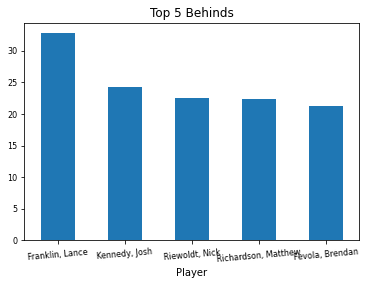

In [35]:
#Bar graph of top 5 players who have had the most behinds from 1999-2019
Behinds_totals = data1_group.sum()
top_5 = Behinds_totals.sort_values(by='Behinds', ascending=False).head()
#top_5.plot(x="Player", y="Goals", kind="bar", rot=5, fontsize=8)
my_plot = top_5['Behinds'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Behinds")

Text(0.5, 1.0, 'Top 5 Hit Outs')

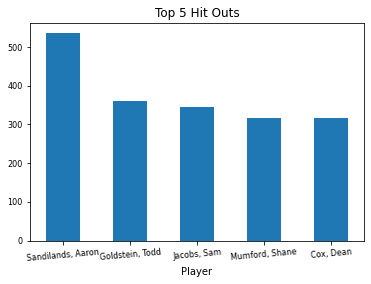

In [36]:
#Bar graph of top 5 players who have had the most hit outs from 1999-2019
Hit_Outs_totals = data1_group.sum()
top_5 = Hit_Outs_totals.sort_values(by='Hit Outs', ascending=False).head()
#top_5.plot(x="Player", y="Goals", kind="bar", rot=5, fontsize=8)
my_plot = top_5['Hit Outs'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Hit Outs")

Text(0.5, 1.0, 'Top 5 Tackles')

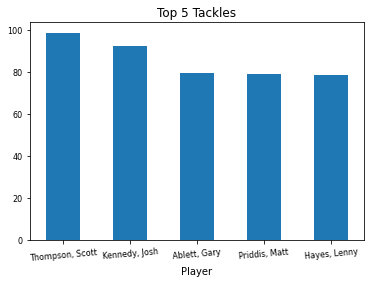

In [37]:
#Bar graph of top 5 players who have had the most tackles from 1999-2019
Tackles_totals = data1_group.sum()
top_5 = Tackles_totals.sort_values(by='Tackles', ascending=False).head()
#top_5.plot(x="Player", y="Goals", kind="bar", rot=5, fontsize=8)
my_plot = top_5['Tackles'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Tackles")

Text(0.5, 1.0, 'Top 5 Rebound 50s')

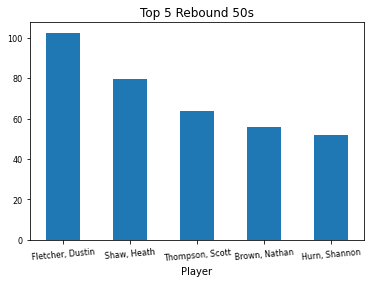

In [38]:
#Bar graph of top 5 players who have had the most rebound 50s from 1999-2019
Rebound_50s_totals = data1_group.sum()
top_5 = Rebound_50s_totals.sort_values(by='Rebound 50s', ascending=False).head()
#top_5.plot(x="Player", y="Goals", kind="bar", rot=5, fontsize=8)
my_plot = top_5['Rebound 50s'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Rebound 50s")

Text(0.5, 1.0, 'Top 5 Inside 50s')

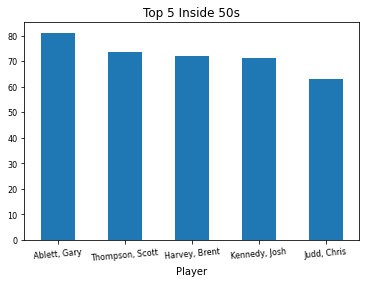

In [39]:
#Bar graph of top 5 players who have had the most inside 50s from 1999-2019
Inside_50s_totals = data1_group.sum()
top_5 = Inside_50s_totals.sort_values(by='Inside 50s', ascending=False).head()
#top_5.plot(x="Player", y="Goals", kind="bar", rot=5, fontsize=8)
my_plot = top_5['Inside 50s'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Inside 50s")

Text(0.5, 1.0, 'Top 5 Clearances')

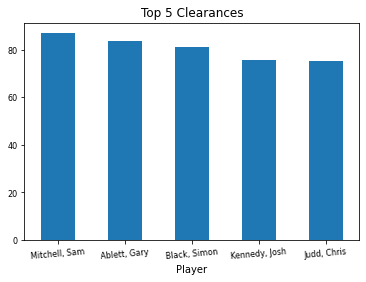

In [40]:
#Bar graph of top 5 players who have had the most clearances from 1999-2019
Clearances_totals = data1_group.sum()
top_5 = Clearances_totals.sort_values(by='Clearances', ascending=False).head()
#top_5.plot(x="Player", y="Goals", kind="bar", rot=5, fontsize=8)
my_plot = top_5['Clearances'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Clearances")

Text(0.5, 1.0, 'Top 5 Clangers')

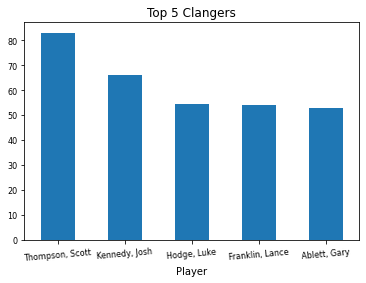

In [41]:
#Bar graph of top 5 players who have had the most clangers from 1999-2019
Clangers_totals = data1_group.sum()
top_5 = Clangers_totals.sort_values(by='Clangers', ascending=False).head()
#top_5.plot(x="Player", y="Goals", kind="bar", rot=5, fontsize=8)
my_plot = top_5['Clangers'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Clangers")

Text(0.5, 1.0, 'Top 5 Free Kicks For')

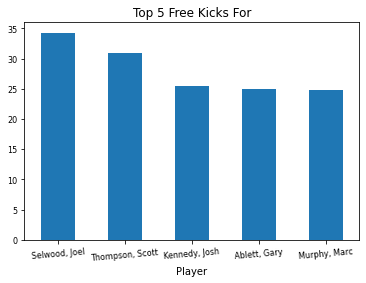

In [42]:
#Bar graph of top 5 players who have had the most free kicks from 1999-2019
Free_Kicks_For_totals = data1_group.sum()
top_5 = Free_Kicks_For_totals.sort_values(by='Free Kicks For', ascending=False).head()
#top_5.plot(x="Player", y="Goals", kind="bar", rot=5, fontsize=8)
my_plot = top_5['Free Kicks For'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Free Kicks For")

Text(0.5, 1.0, 'Top 5 Free Kicks Against')

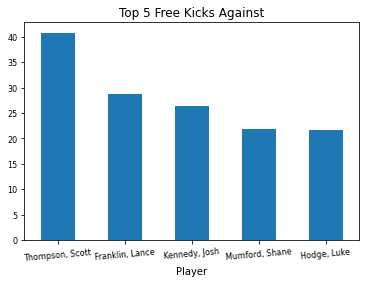

In [43]:
#Bar graph of top 5 players who have conceeded the most kicks from 1999-2019
Free_Kicks_Against_totals = data1_group.sum()
top_5 = Free_Kicks_Against_totals.sort_values(by='Free Kicks Against', ascending=False).head()
#top_5.plot(x="Player", y="Goals", kind="bar", rot=5, fontsize=8)
my_plot = top_5['Free Kicks Against'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Free Kicks Against")

Text(0.5, 1.0, 'Top 5 Brownlow Votes')

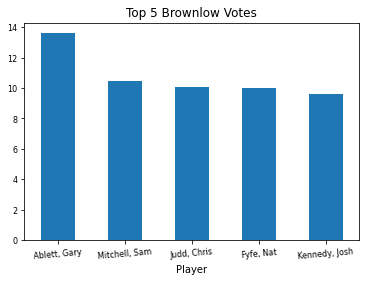

In [44]:
#Bar graph of top 5 players who have had the most brownlow votes from 1999-2019
Brownlow_Votes_totals = data1_group.sum()
top_5 = Brownlow_Votes_totals.sort_values(by='Brownlow Votes', ascending=False).head()
#top_5.plot(x="Player", y="Goals", kind="bar", rot=5, fontsize=8)
my_plot = top_5['Brownlow Votes'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Brownlow Votes")

Text(0.5, 1.0, 'Top 5 Contested Possessions')

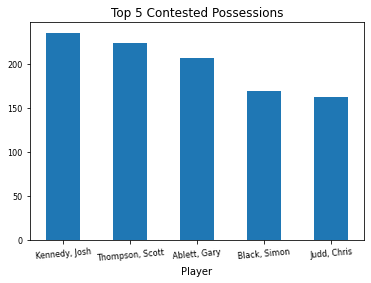

In [45]:
#Bar graph of top 5 players who have had the most contested possessions from 1999-2019
Contested_Possessions_totals = data1_group.sum()
top_5 = Contested_Possessions_totals.sort_values(by='Contested Possessions', ascending=False).head()
#top_5.plot(x="Player", y="Goals", kind="bar", rot=5, fontsize=8)
my_plot = top_5['Contested Possessions'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Contested Possessions")

Text(0.5, 1.0, 'Top 5 Uncontested Possessions')

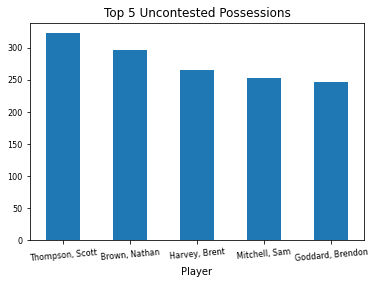

In [46]:
#Bar graph of top 5 players who have had the most uncontested possessions from 1999-2019
Uncontested_Possessions_totals = data1_group.sum()
top_5 = Uncontested_Possessions_totals.sort_values(by='Uncontested Possessions', ascending=False).head()
my_plot = top_5['Uncontested Possessions'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Uncontested Possessions")

Text(0.5, 1.0, 'Top 5 Contested Marks')

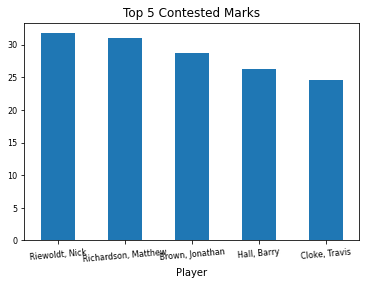

In [47]:
#Bar graph of top 5 players who have had the most contested marks from 1999-2019
Contested_Marks_totals = data1_group.sum()
top_5 = Contested_Marks_totals.sort_values(by='Contested Marks', ascending=False).head()
my_plot = top_5['Contested Marks'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Contested Marks")

Text(0.5, 1.0, 'Top 5 Marks Inside 50')

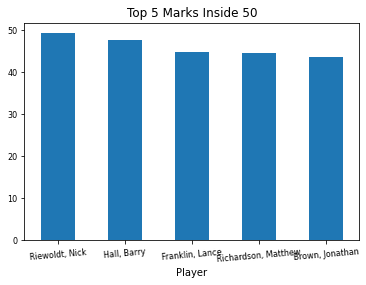

In [48]:
#Bar graph of top 5 players who have had the most marks inside 50 from 1999-2019
Marks_Inside_50_totals = data1_group.sum()
top_5 = Marks_Inside_50_totals.sort_values(by='Marks Inside 50', ascending=False).head()
my_plot = top_5['Marks Inside 50'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Marks Inside 50")

Text(0.5, 1.0, 'Top 5 One Percenters')

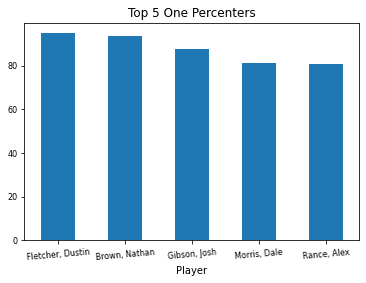

In [49]:
#Bar graph of top 5 players who have had the most one percenters from 1999-2019
One_Percenters_totals = data1_group.sum()
top_5 = One_Percenters_totals.sort_values(by='One Percenters', ascending=False).head()
my_plot = top_5['One Percenters'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 One Percenters")

Text(0.5, 1.0, 'Top 5 Bounces')

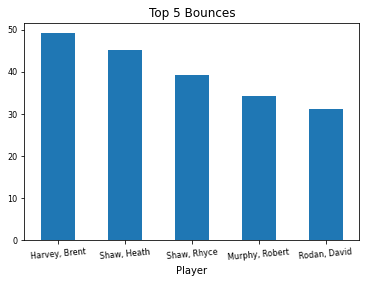

In [50]:
#Bar graph of top 5 players who have had the most bounce of the ball from 1999-2019
Bounces_totals = data1_group.sum()
top_5 = Bounces_totals.sort_values(by='Bounces', ascending=False).head()
my_plot = top_5['Bounces'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Bounces")

In [51]:
# Converting variable goal assists to float.
for x in data['Goal Assists'].unique():
    try:
        float(x)
    except:
        print([x])

In [52]:
data['Goal Assists'] = data['Goal Assists'].apply(lambda x : np.nan if x == "\xa0" else x).astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     12741 non-null  int64  
 1   Player                   12741 non-null  object 
 2   Players                  12741 non-null  object 
 3   Team                     12741 non-null  object 
 4   Games                    12741 non-null  int64  
 5   Kicks                    12741 non-null  float64
 6   Marks                    12741 non-null  float64
 7   Handballs                12741 non-null  float64
 8   Disposals                12730 non-null  float64
 9   Goals                    12741 non-null  float64
 10  Behinds                  12741 non-null  float64
 11  Hit Outs                 12741 non-null  float64
 12  Tackles                  12741 non-null  float64
 13  Rebound 50s              12741 non-null  float64
 14  Inside 50s            

Text(0.5, 1.0, 'Top 5 Goal Assists')

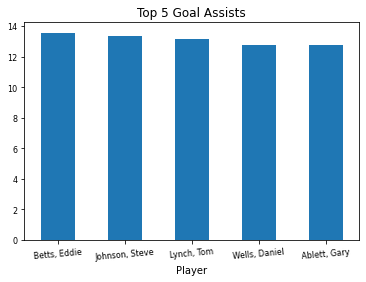

In [53]:
#Bar graph of top 5 players who have had the most goal assists from 1999-2019
data1_group = data.groupby('Player')
Goal_Assists_totals = data1_group.sum()
top_5 = Goal_Assists_totals.sort_values(by='Goal Assists', ascending=False).head()
my_plot = top_5['Goal Assists'].plot(kind='bar',rot=5, fontsize=8)
plt.title("Top 5 Goal Assists")

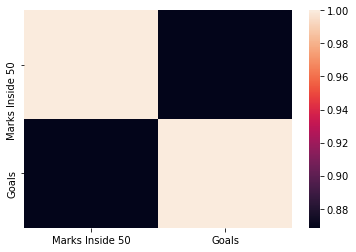

In [55]:
#Correlation between marks inside 50 and goals
corr_matrix = data[['Marks Inside 50', 'Goals']].corr()
sns.heatmap(corr_matrix)

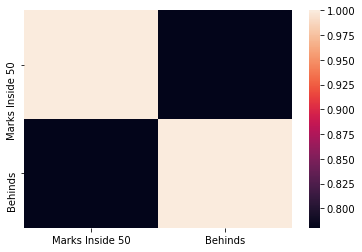

In [56]:
#Correlation between marks inside 50 and behinds
corr_matrix = data[['Marks Inside 50', 'Behinds']].corr()
sns.heatmap(corr_matrix)

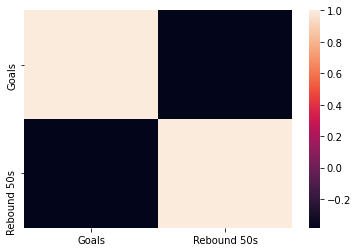

In [57]:
#Correlation between rebound 50s and goals
corr_matrix = data[['Goals', 'Rebound 50s']].corr()
sns.heatmap(corr_matrix)

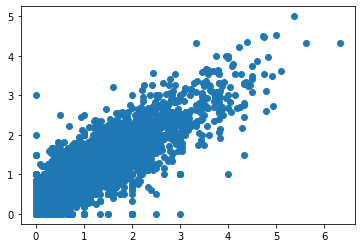

In [58]:
#Scatterplot between marks inside 50 and goals
X = data['Marks Inside 50'].values.reshape(-1,1)
Y = data['Goals']
plt.scatter(X, Y)

[0.77328762] 0.1337875667633867


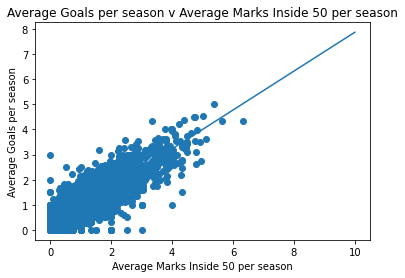

In [60]:
#Linear regression plot between marks inside 50 and goals
#Goals and marks inside 50 from the dataset are the average goals and marks inside 50 respectively for each player per season
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X, Y)
Xfit = np.linspace(0, 10, 1000)
Yfit = linreg.predict(Xfit[:, np.newaxis])
plt.scatter(X, Y)
plt.xlabel('Average Marks Inside 50 per season')
plt.ylabel('Average Goals per season')
plt.title ('Average Goals per season v Average Marks Inside 50 per season')
plt.plot(Xfit, Yfit, label = 'Score Difference = -0.9853 * Away Team Goals + 1.792');
print(linreg.coef_, linreg.intercept_)

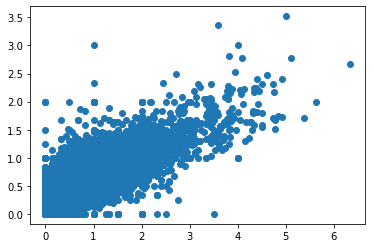

In [61]:
#Scatterplot between marks inside 50 and behinds
X = data['Marks Inside 50'].values.reshape(-1,1)
Y = data['Behinds']
plt.scatter(X, Y)

[0.45857986] 0.1503020423348303


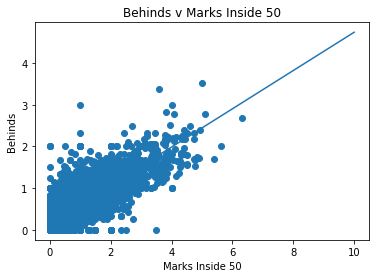

In [62]:
#Linear regression plot between marks inside 50 and behinds
#behinds and marks inside 50 from the dataset are the average behinds and marks inside 50 respectively for each player per season
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X, Y)
Xfit = np.linspace(0, 10, 1000)
Yfit = linreg.predict(Xfit[:, np.newaxis])
plt.scatter(X, Y)
plt.xlabel('Marks Inside 50')
plt.ylabel('Behinds')
plt.title ('Behinds v Marks Inside 50')
plt.plot(Xfit, Yfit, label = 'Score Difference = -0.9853 * Away Team Goals + 1.792');
print(linreg.coef_, linreg.intercept_)

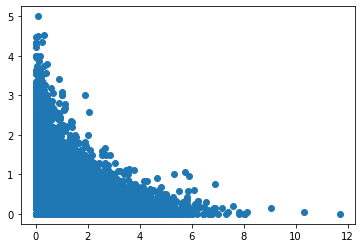

In [63]:
#Scatterplot between goals and rebound 50s
X = data['Rebound 50s'].values.reshape(-1,1)
Y = data['Goals']
plt.scatter(X, Y)

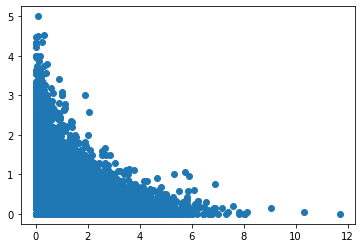

In [64]:
#Scatterplot between goals and rebound 50s
X = data['Rebound 50s'].values.reshape(-1,1)
Y = data['Goals']
plt.scatter(X, Y)

[-0.19760704] 0.80342511700106


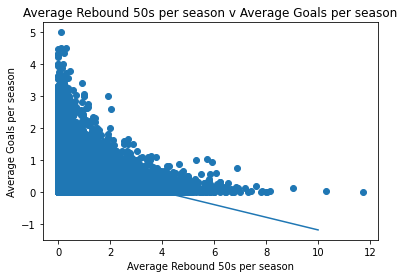

In [66]:
#Linear regression plot between rebound 50s and goals
#Goals and rebound 50s from the dataset are the average goals and rebound 50s respectively for each player per season
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X, Y)
Xfit = np.linspace(0, 10, 1000)
Yfit = linreg.predict(Xfit[:, np.newaxis])
plt.scatter(X, Y)
plt.xlabel('Average Rebound 50s per season')
plt.ylabel('Average Goals per season')
plt.title ('Average Rebound 50s per season v Average Goals per season')
plt.plot(Xfit, Yfit, label = 'Score Difference = -0.9853 * Away Team Goals + 1.792');
print(linreg.coef_, linreg.intercept_)

In [67]:
#Linear regression score between goals and rebound 50s. 
linreg.score(X, Y)

0.1465803981151642

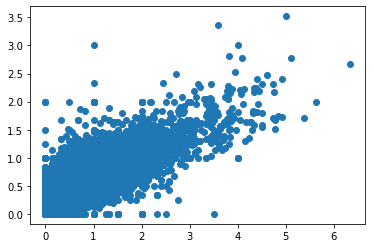

In [68]:
#Scatterplot between behinds and marks inside 50
X = data['Marks Inside 50'].values.reshape(-1,1)
Y = data['Behinds']
plt.scatter(X, Y)

[0.45857986] 0.1503020423348303


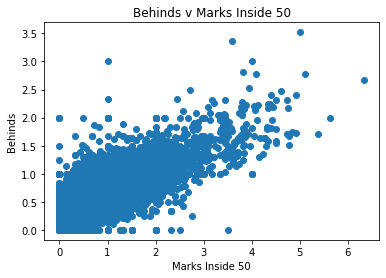

In [69]:
#Linear regression plot between marks inside 50 and behinds
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X, Y)
Xfit = np.linspace(0, 10, 1000)
Yfit = linreg.predict(Xfit[:, np.newaxis])
plt.scatter(X, Y)
plt.xlabel('Marks Inside 50')
plt.ylabel('Behinds')
plt.title ('Behinds v Marks Inside 50')
print(linreg.coef_, linreg.intercept_)

In [70]:
#Linear regression score between behinds and marks inside 50. 
linreg.score(X, Y)

0.6089796412675077

In [71]:
#Linear regression coefficient calculations for goals versus marks inside 50.
X = data['Marks Inside 50'].values.reshape(-1,1)
Y = data['Goals']
linreg = LinearRegression()
linreg.fit(X, Y)
print(linreg.coef_, linreg.intercept_)

[0.77328762] 0.1337875667633867


In [72]:
#importing test and training data
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [74]:
## Check training/test data

# About training
print('X_train is a %s' % type(X_train))
print('X_train has %d rows', X_train.shape[0])
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_train[:10])

print('')
print('y_train is a %s' % type(y_train))
print('y_train has %d rows', y_train.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(y_train[:10])

X_train is a <class 'numpy.ndarray'>
X_train has %d rows 10192

Sample of X_train__________________________________________________
[[0.69]
 [0.21]
 [0.05]
 [0.32]
 [0.23]
 [0.29]
 [0.  ]
 [0.33]
 [1.06]
 [1.37]]

y_train is a <class 'pandas.core.series.Series'>
y_train has %d rows (10192,)

Sample of y_train__________________________________________________
5435    0.77
3492    0.26
7555    0.00
5707    0.55
1427    0.31
7913    0.00
3897    0.00
2122    0.50
6495    0.76
9129    0.79
Name: Goals, dtype: float64


[0.80061584] 0.11405254089173711


Text(0.5, 1.0, 'Average Goals per season v Average Marks Inside 50 per season using test data')

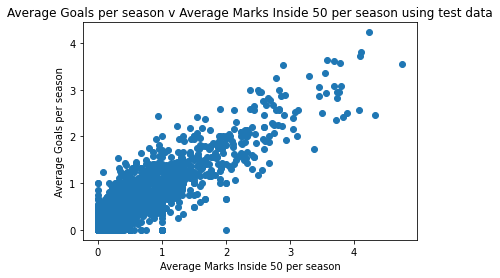

In [76]:
#Linear regression scatter plot between average marks inside 50 and average goals per season using test data and then calculating the linear regression coefficients
linreg = LinearRegression()
linreg.fit(X_test, y_test)
plt.scatter(X_test, y_test)
print(linreg.coef_, linreg.intercept_)
plt.xlabel('Average Marks Inside 50 per season')
plt.ylabel('Average Goals per season')
plt.title ('Average Goals per season v Average Marks Inside 50 per season using test data')

[0.76679607] 0.1385427545988444


Text(0.5, 1.0, 'Average Goals per season v Average Marks Inside 50 per season using training data')

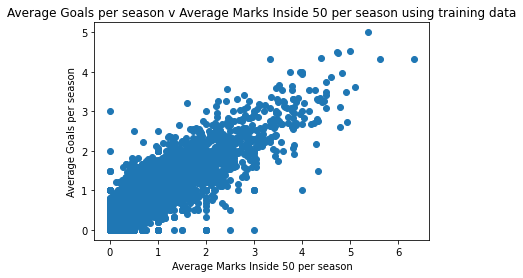

In [78]:
#Linear regression scatter plot between average marks inside 50 and average goals per season using training data and then calculating the linear regression coefficients
linreg = LinearRegression()
linreg.fit(X_train, y_train)
plt.scatter(X_train, y_train)
print(linreg.coef_, linreg.intercept_)
plt.xlabel('Average Marks Inside 50 per season')
plt.ylabel('Average Goals per season')
plt.title ('Average Goals per season v Average Marks Inside 50 per season using training data')

In [79]:
# Linear regression coefficient calculations for rebound 50s versus goals
X = data['Rebound 50s'].values.reshape(-1,1)
Y = data['Goals']
linreg = LinearRegression()
linreg.fit(X, Y)
print(linreg.coef_, linreg.intercept_)

[-0.19760704] 0.80342511700106


In [80]:
#importing test and training library
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [82]:
## Check training/test data

# About training
print('X_train is a %s' % type(X_train))
print('X_train has %d rows', X_train.shape[0])
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_train[:10])

print('')
print('y_train is a %s' % type(y_train))
print('y_train has %d rows', y_train.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(y_train[:10])

X_train is a <class 'numpy.ndarray'>
X_train has %d rows 10192

Sample of X_train__________________________________________________
[[0.2 ]
 [1.85]
 [3.6 ]
 [1.89]
 [5.  ]
 [1.31]
 [0.53]
 [6.67]
 [0.36]
 [0.  ]]

y_train is a <class 'pandas.core.series.Series'>
y_train has %d rows (10192,)

Sample of y_train__________________________________________________
11310    0.40
9137     0.15
939      0.10
3038     0.33
10751    0.00
11746    0.46
9166     1.37
12196    0.00
2097     1.55
278      1.68
Name: Goals, dtype: float64


[-0.19816095] 0.8099392978286453


Text(0.5, 1.0, 'Average Goals per season v Average Rebound 50s per season using training data')

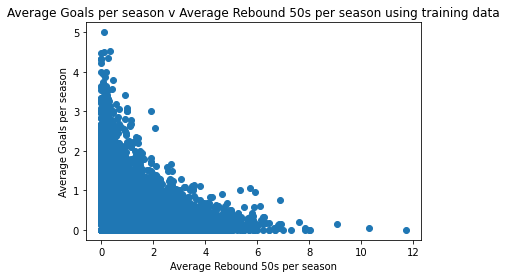

In [84]:
#Linear regression scatter plot between average rebound 50s and average goals per season using training data and then calculating the linear regression coefficients
linreg = LinearRegression()
linreg.fit(X_train, y_train)
plt.scatter(X_train, y_train)
print(linreg.coef_, linreg.intercept_)
plt.xlabel('Average Rebound 50s per season')
plt.ylabel('Average Goals per season')
plt.title ('Average Goals per season v Average Rebound 50s per season using training data')

[-0.19531343] 0.7772717679919188


Text(0.5, 1.0, 'Average Goals per season v Average Rebound 50s per season using test data')

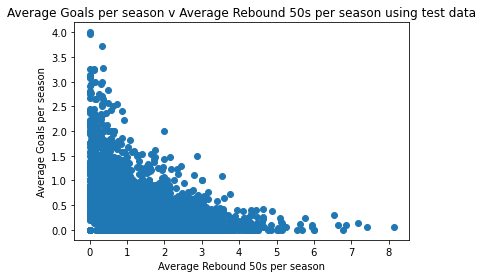

In [85]:
#Linear regression scatter plot between average rebound 50s and average goals per season using test data and then calculating the linear regression coefficients
linreg = LinearRegression()
linreg.fit(X_test, y_test)
plt.scatter(X_test, y_test)
print(linreg.coef_, linreg.intercept_)
plt.xlabel('Average Rebound 50s per season')
plt.ylabel('Average Goals per season')
plt.title ('Average Goals per season v Average Rebound 50s per season using test data')

In [ ]:
# Linear regression scatterplot and coefficient calculations for marks inside 50 versus goals.
linreg = LinearRegression()
linreg.fit(X_test, y_test)
plt.scatter(X_test, y_test)
print(linreg.coef_, linreg.intercept_)
plt.xlabel('Marks Inside 50')
plt.ylabel('Goals')
plt.title ('Goals v Marks Inside 50')

[0.78709977] 0.13401719940094015


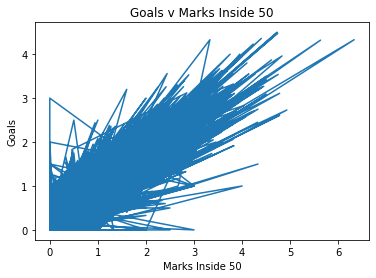

In [83]:
# Linear regression scatterplot and coefficient calculations for marks inside 50 versus goals using test data.
linreg = LinearRegression()
linreg.fit(X_test, y_test)
plt.plot(X_train, y_train)
plt.xlabel('Marks Inside 50')
plt.ylabel('Goals')
plt.title ('Goals v Marks Inside 50')
print(linreg.coef_, linreg.intercept_)

In [84]:
#Linear regression score calculation for marks inside 50 versus goals using test data.
linreg.score(X_test, y_test)

0.7686661706870256

In [85]:
#Predicting goals kicked from marks inside 50.
beta0 = linreg.intercept_
beta1 = linreg.coef_
x = 25

Ypred = beta1 * x + beta0
print('Goals: ', Ypred[0])

Goals:  19.811511502994357


In [86]:
#importing numpy
import numpy as np
import matplotlib.pyplot as plt
# get matplot to show charts inline
%matplotlib inline

In [87]:
#importing statsmodels
import statsmodels.api as sm
import numpy as np
import pandas as pd

In [88]:
#Ordinary least squares regression between goals, marks inside 50, kicks and handballs. 
X= data[['Marks Inside 50', 'Kicks', 'Handballs']]
y = data['Goals']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Goals   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                          2.850e+04
Date:                Thu, 15 Oct 2020   Prob (F-statistic):                        0.00
Time:                        19:08:30   Log-Likelihood:                         -2244.6
No. Observations:               12741   AIC:                                      4495.
Df Residuals:                   12738   BIC:                                      4517.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Marks Inside 50     0.7581      0.004    200.383      0.000       0.751       0.766
Kicks               0.0217      0.001     27.243      0.000       0.020       0.023
Handballs          -0.0055      0.001     -5.583      0.000      -0.007      -0.004
==============================================================================
Omnibus:                     2174.659   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16727.013
Skew:                           0.607   Prob(JB):                         0.00
Kurtosis:                       8.480   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
#importing standard scalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xss = scaler.fit_transform(X)
from sklearn.cluster import KMeans

k = 2
# 2 Clusters
k_mean2 = KMeans(n_clusters=k)
k_mean2.fit(Xss)

KMeans(n_clusters=2)

In [90]:
# Labels for 2 Clusters
labels_2 = k_mean2.labels_
print(labels_2)

[1 1 1 ... 0 0 0]


In [91]:
#Calculating sum of squared distances
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Xss)
    Sum_of_squared_distances.append(km.inertia_)

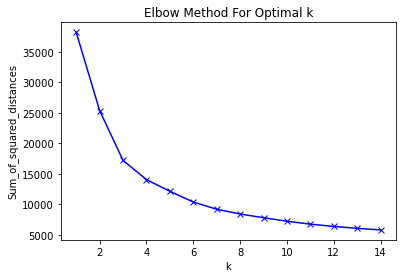

In [92]:
#Plot of sum of squared distances through Elbow method
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

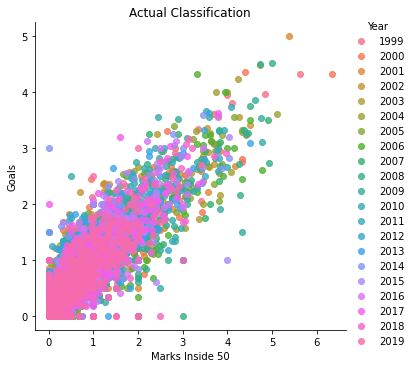

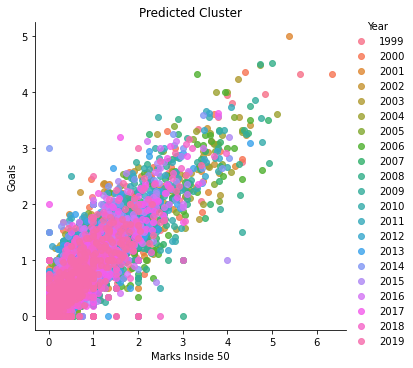

In [93]:
#length x groove_length
#Actual classification and predicted cluster between goals and marks inside 50 by year. 
data_labels = data
data_labels['labels'] = labels_2

sns.lmplot(x='Marks Inside 50', y='Goals', data=data_labels, hue='Year', 
           fit_reg=False)
plt.title('Actual Classification')
sns.lmplot(x='Marks Inside 50', y='Goals', data=data_labels, hue='Year', fit_reg=False)
plt.title('Predicted Cluster')
plt.show();

[[0.5884681  0.68323689]
 [3.02619753 2.53646914]
 [1.46654632 1.37650545]
 [0.13050307 0.15606403]]


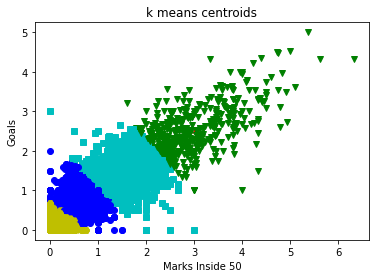

In [94]:
x1 = np.array(data['Marks Inside 50'])
x2 = np.array(data['Goals'])

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'c', 'y']
markers = ['o', 'v', 's', 'H']

# KMeans algorithm 
K = 4
kmeans_model = KMeans(n_clusters=K).fit(X)

print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

plt.plot()
plt.title('k means centroids')
plt.xlabel('Marks Inside 50')
plt.ylabel('Goals')

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')

plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()

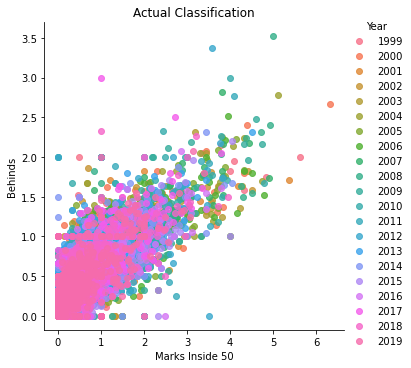

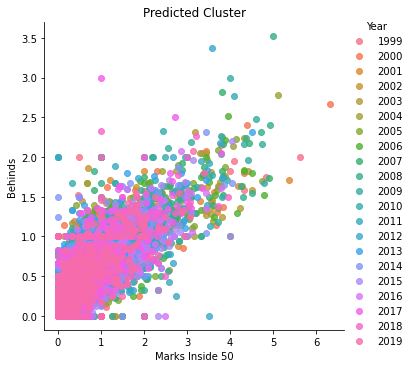

In [95]:
#length x groove_length
#Actual classification and predicted cluster between behinds and marks inside 50 by year. 
data_labels = data
data_labels['labels'] = labels_2

sns.lmplot(x='Marks Inside 50', y='Behinds', data=data_labels, hue='Year', 
           fit_reg=False)
plt.title('Actual Classification')
sns.lmplot(x='Marks Inside 50', y='Behinds', data=data_labels, hue='Year', fit_reg=False)
plt.title('Predicted Cluster')
plt.show();

[[0.1241103  0.13628737]
 [2.99590278 1.48349537]
 [1.44409782 0.88245208]
 [0.57227855 0.51526882]]


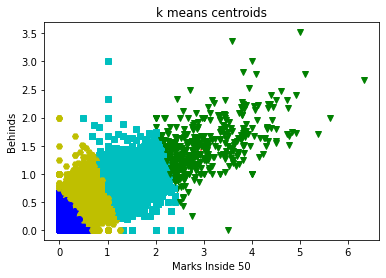

In [96]:
x1 = np.array(data['Marks Inside 50'])
x2 = np.array(data['Behinds'])

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'c', 'y']
markers = ['o', 'v', 's', 'H']

# KMeans algorithm 
K = 4
kmeans_model = KMeans(n_clusters=K).fit(X)

print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

plt.plot()
plt.title('k means centroids')
plt.xlabel('Marks Inside 50')
plt.ylabel('Behinds')

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')

plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()

In [117]:
#Median goals grouped by player
data.groupby("Player")["Goals"].transform("median")

0        0.750
1        0.620
2        0.890
3        0.490
4        0.805
         ...  
12736    0.000
12737    0.000
12738    0.255
12739    0.425
12740    0.165
Name: Goals, Length: 12741, dtype: float64

In [118]:
# ANSWER
#Making goal kicker as target variable and forward player as independent variable. 
feature_cols = ['Forward Player']
X = data[feature_cols]
Y = data['Goal Kicker']

In [119]:
#import train and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [121]:
# ANSWER
logreg = LogisticRegression()

In [122]:
# ANSWER
logreg.fit(X_train, Y_train)

LogisticRegression()

In [123]:
# ANSWER
logreg.fit(X_test, Y_test)

LogisticRegression()

In [124]:
logreg.coef_

array([[0.77301754]])

In [125]:
logreg.intercept_

array([-3.29055016])

[[1.24983195]] [-3.53680094]

[[0.97171692 0.02828308]
 [0.90779205 0.09220795]
 [0.97171692 0.02828308]
 ...
 [0.97171692 0.02828308]
 [0.97171692 0.02828308]
 [0.97171692 0.02828308]]


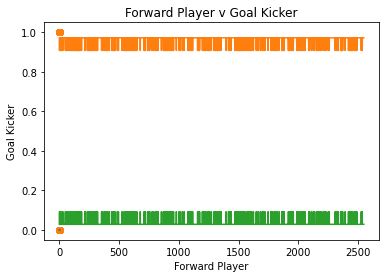

In [126]:
#Logistic regression plot between goal kicker and forward player
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept=True)
logreg.fit(X, Y)
plt.scatter(X, Y)
Xfit = np.linspace(0, 1, 50)
Yfit = logreg.predict(Xfit[:, np.newaxis])
plt.scatter(X, Y)
plt.xlabel('Forward Player')
plt.ylabel('Goal Kicker')
plt.title ('Forward Player v Goal Kicker')
plt.plot(Xfit, Yfit, label = 'Impact of forward role on goal kicking');
print(logreg.coef_, logreg.intercept_)
print()
print(logreg.predict_proba(X_test))
plt.plot(logreg.predict_proba(X_test))

In [127]:
# ANSWER
print(set(zip(feature_cols, logreg.coef_[0])))

{('Forward Player', 1.249831953741392)}


In [128]:
for col in zip(X_train.columns, logreg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Forward Player  +1.249832


In [129]:
print('accuracy= {:7.4f}'.format(logreg.score(X_test, Y_test)))

accuracy=  0.9600


In [130]:
#Creating variable Goal_Assists that equals Goal Assist from dataset
data['Goal_Assists']=data['Goal Assists']

In [131]:
#Imputation of Disposals and Goal Assists as they are the only 2 variables with missing values as worked out above earlier in the code.
data['Disposals'].fillna(data.Disposals.mean(), inplace=True)
data['Goal_Assists'].fillna(data.Goal_Assists.mean(), inplace=True)
feature_cols = ['Forward Player', 'Disposals', 'Goal Assists']
X = data[feature_cols]

In [132]:
# Build Model
#Accuracy of logistic regression for training data between goal kicker and forward player
logreg = LogisticRegression()
# Fit Model
logreg.fit(X_train, Y_train)
# Score
logreg_score = logreg.score(X_train, Y_train)
print('accuracy = {:1.4f}'.format(logreg_score))

accuracy = 0.9658


In [133]:
# Build Model
#Accuracy of logistic regression for test data between goal kicker and forward player
logreg = LogisticRegression()
# Fit Model
logreg.fit(X_test, Y_test)
# Score
logreg_score = logreg.score(X_test, Y_test)
print('accuracy = {:1.4f}'.format(logreg_score))

accuracy = 0.9600


In [135]:
def get_logreg_score(data, feature_cols, target_col):
    X = data[feature_cols]
    y = data[target_col]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

    # Build Model
    logreg = LogisticRegression()

    # Fit
    logreg.fit(X_train, y_train)

    # Score
    logreg_score = logreg.score(X_test, y_test)

    # Return accuracy rate
    return logreg_score

In [136]:
#Logistic regression score for goal kicker versus forward player
feature_cols = ['Forward Player']
target_col = ['Goal Kicker']
X = data[feature_cols]
Y = data['Goal Kicker']
get_logreg_score(data, feature_cols, target_col)

C:\Users\WIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9645323289391086

In [117]:
# ANSWER
#Confusion matrix between goal kicker and forward player.
y_pred_class = logreg.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred_class))

[[2449    0]
 [ 100    0]]


In [118]:
#Array fr confusion matrix
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


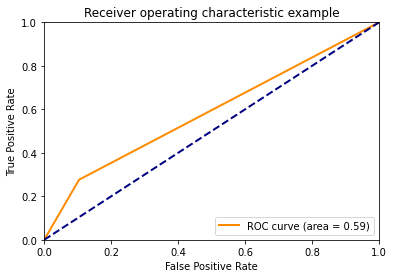

In [119]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(Y_train, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

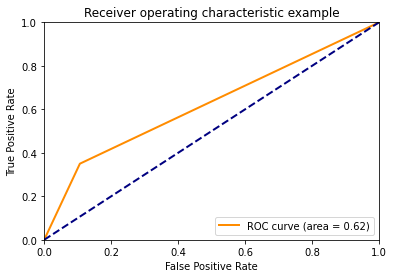

In [120]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [133]:
# ANSWER 
#target variable is goal kicker with additional variables included to improve model performance
feature_cols = ['Forward Player','Marks Inside 50' , 'Contested Marks', 'Disposals', 'Goal_Assists']
target_col = ['Goal Kicker']
X = data[feature_cols]
Y = data['Goal Kicker']
get_logreg_score(data, feature_cols, target_col)

C:\Users\WIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9795982423101067

In [134]:
#Splitting training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [135]:
#Creating logistic regression score function below. 
def get_logreg_score(data, feature_cols, target_col):
    X = data[feature_cols]
    y = data[target_col]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

    # Build Model
    logreg = LogisticRegression()

    # Fit
    logreg.fit(X_train, y_train)

    # Score
    logreg_score = logreg.score(X_test, y_test)

    # Return accuracy rate
    return logreg_score

In [136]:
# Build Model
#Calculating model accuracy with the additional variables above included using training data.
logreg = LogisticRegression()
# Fit Model
logreg.fit(X_train, Y_train)
# Score
logreg_score = logreg.score(X_train, Y_train)
print('accuracy = {:1.4f}'.format(logreg_score))

accuracy = 0.9805


In [137]:
# Build Model
#Calculating model accuracy with the additional variables above included using test data.
logreg = LogisticRegression()
# Fit Model
logreg.fit(X_test, Y_test)
# Score
logreg_score = logreg.score(X_test, Y_test)
print('accuracy = {:1.4f}'.format(logreg_score))

accuracy = 0.9820


In [138]:
# ANSWER
def plot_roc_curve(X_test, y_test):
    # Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = logreg.predict_proba(X_test)[:,1]

    # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    # Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

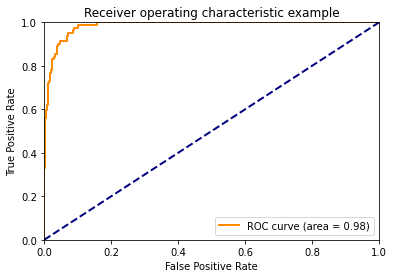

In [139]:
plot_roc_curve(X_test, Y_test)

In [140]:
# ANSWER
def plot_roc_curve(X_train, Y_train):
    # Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = logreg.predict_proba(X_train)[:,1]

    # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(Y_train, preds)

    # Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

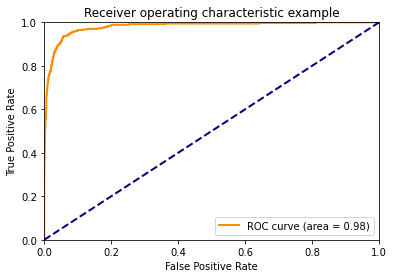

In [141]:
plot_roc_curve(X_train, Y_train)

In [131]:
#importing pandas and numpy libraries
import pandas as pd
import numpy as np

In [132]:
#reading player statistics dataset
data = pd.read_csv('C:\\Users\\WIN\\Desktop\\Data Science labs\\Capstone Project\\Data\\combined.csv')
print(data)

       Year              Player            Players Team  Games  Kicks  Marks  \
0      1999       Ratten, Brett       Brett Ratten   CA     26  13.46   2.62   
1      1999     Crawford, Shane     Shane Crawford   HW     22  17.64   4.64   
2      1999    Cresswell, Daryn    Daryn Cresswell   SY     23  15.30   4.26   
3      1999      Bradley, Craig      Craig Bradley   CA     26  16.54   3.69   
4      1999         Bell, Peter         Peter Bell   KA     25  17.08   3.84   
...     ...                 ...                ...  ...    ...    ...    ...   
12736  2019   McInerney, Justin   Justin McInerney   SY      1   1.00   0.00   
12737  2019  Vickers-Willis, Ed  Ed Vickers-Willis   NM      1   0.00   0.00   
12738  2019       Sheridan, Tom       Tom Sheridan   GW      1   0.00   1.00   
12739  2019        Ward, Callan        Callan Ward   GW      1   1.00   0.00   
12740  2019         Mutch, Kobe         Kobe Mutch   ES      1   0.00   0.00   

       Handballs Disposals  Goals  ... 

In [133]:
#Reading first 10 rows of dataset
data.head(10)

,Year,Player,Players,Team,Games,Kicks,Marks,Handballs,Disposals,Goals,...,Contested Possessions,Uncontested Possessions,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,Position,Forward Player,Goal Kicker
0,1999,"Ratten, Brett",Brett Ratten,CA,26,13.46,2.62,12.31,25.77,0.54,...,12.85,13.46,0.27,0.50,1.50,0.04,,Utility,0,0
1,1999,"Crawford, Shane",Shane Crawford,HW,22,17.64,4.64,11.45,29.09,0.64,...,11.68,16.09,0.41,0.41,2.14,1.59,,Utility,0,0
2,1999,"Cresswell, Daryn",Daryn Cresswell,SY,23,15.30,4.26,12.35,27.65,0.78,...,10.43,16.78,0.35,0.65,0.87,1.05,,Utility,0,0
3,1999,"Bradley, Craig",Craig Bradley,CA,26,16.54,3.69,7.54,24.08,0.35,...,7.15,16.50,0.42,0.50,1.77,1.96,,Utility,0,0
4,1999,"Bell, Peter",Peter Bell,KA,25,17.08,3.84,7.80,24.88,1.28,...,11.48,12.88,0.40,0.72,1.20,0.64,,Utility,0,0
5,1999,"Schwass, Wayne",Wayne Schwass,SY,23,18.65,4.26,8.00,26.65,0.39,...,8.17,17.52,0.22,0.30,1.52,1.95,,Utility,0,0
6,1999,"Fletcher, Adrian",Adrian Fletcher,FR,22,13.55,4.77,12.86,26.41,0.41,...,13.23,14.36,1.00,0.36,1.00,0.32,,Utility,0,0
7,1999,"Ashcroft, Marcus",Marcus Ashcroft,BL,25,14.28,3.68,8.72,23,0.64,...,8.68,14.40,0.16,0.36,0.88,0.80,,Utility,0,0
8,1999,"Campbell, Wayne",Wayne Campbell,RI,22,17.27,4.27,7.95,25.23,0.77,...,10.73,13.82,0.95,0.55,1.64,1.10,,Utility,0,0
9,1999,"Murphy, Justin",Justin Murphy,CA,23,13.30,5.26,10.61,23.91,0.78,...,7.30,17.35,0.43,0.52,0.83,0.36,,Utility,0,0


In [134]:
# Converting variable goal assists to float.
for x in data['Goal Assists'].unique():
    try:
        float(x)
    except:
        print([x])
data['Goal Assists'] = data['Goal Assists'].apply(lambda x : np.nan if x == "\xa0" else x).astype('float')
data.info()

['\xa0']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     12741 non-null  int64  
 1   Player                   12741 non-null  object 
 2   Players                  12741 non-null  object 
 3   Team                     12741 non-null  object 
 4   Games                    12741 non-null  int64  
 5   Kicks                    12741 non-null  float64
 6   Marks                    12741 non-null  float64
 7   Handballs                12741 non-null  float64
 8   Disposals                12741 non-null  object 
 9   Goals                    12741 non-null  float64
 10  Behinds                  12741 non-null  float64
 11  Hit Outs                 12741 non-null  float64
 12  Tackles                  12741 non-null  float64
 13  Rebound 50s              12741 non-null  float64
 14  Inside 50s   

In [135]:
# Converting variable Disposals to float.
for x in data['Disposals'].unique():
    try:
        float(x)
    except:
        print([x])
data['Disposals'] = data['Disposals'].apply(lambda x : np.nan if x == "\xa0" else x).astype('float')
data.info()

['\xa0']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     12741 non-null  int64  
 1   Player                   12741 non-null  object 
 2   Players                  12741 non-null  object 
 3   Team                     12741 non-null  object 
 4   Games                    12741 non-null  int64  
 5   Kicks                    12741 non-null  float64
 6   Marks                    12741 non-null  float64
 7   Handballs                12741 non-null  float64
 8   Disposals                12730 non-null  float64
 9   Goals                    12741 non-null  float64
 10  Behinds                  12741 non-null  float64
 11  Hit Outs                 12741 non-null  float64
 12  Tackles                  12741 non-null  float64
 13  Rebound 50s              12741 non-null  float64
 14  Inside 50s   

In [136]:
#Using label encoding to convert categorical variable, player to numerical.
data["Player"]=data["Player"].astype('category')
data.dtypes
data["Player_coded"] = data["Player"].cat.codes
data.head()

,Year,Player,Players,Team,Games,Kicks,Marks,Handballs,Disposals,Goals,...,Uncontested Possessions,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,Position,Forward Player,Goal Kicker,Player_coded
0,1999,"Ratten, Brett",Brett Ratten,CA,26,13.46,2.62,12.31,25.77,0.54,...,13.46,0.27,0.50,1.50,0.04,NaN,Utility,0,0,1717
1,1999,"Crawford, Shane",Shane Crawford,HW,22,17.64,4.64,11.45,29.09,0.64,...,16.09,0.41,0.41,2.14,1.59,NaN,Utility,0,0,436
2,1999,"Cresswell, Daryn",Daryn Cresswell,SY,23,15.30,4.26,12.35,27.65,0.78,...,16.78,0.35,0.65,0.87,1.05,NaN,Utility,0,0,437
3,1999,"Bradley, Craig",Craig Bradley,CA,26,16.54,3.69,7.54,24.08,0.35,...,16.50,0.42,0.50,1.77,1.96,NaN,Utility,0,0,210
4,1999,"Bell, Peter",Peter Bell,KA,25,17.08,3.84,7.80,24.88,1.28,...,12.88,0.40,0.72,1.20,0.64,NaN,Utility,0,0,129


In [137]:
data["Player"].value_counts()

Brown, Nathan      30
Thompson, Scott    29
Kennedy, Josh      26
Lynch, Tom         19
Reid, Sam          19
                   ..
Hore, Marty         1
Hollands, Ben       1
Hogg, Matthew       1
Hiscox, Jack        1
Lee, Brendan        1
Name: Player, Length: 2333, dtype: int64

In [138]:
data["Player_coded"].value_counts()

245     30
2090    29
1093    26
1247    19
1730    19
        ..
380      1
372      1
348      1
337      1
41       1
Name: Player_coded, Length: 2333, dtype: int64

In [139]:
#Using label encoding to convert the remaining categorical variables to numerical.
data["Players"] = data["Players"].astype('category')
data.dtypes
data["Players_coded"] = data["Player"].cat.codes
data.head()
data["Team"] = data["Team"].astype('category')
data.dtypes
data["Team_coded"] = data["Team"].cat.codes
data.head()
data["Position"] = data["Position"].astype('category')
data.dtypes
data["Position_coded"] = data["Position"].cat.codes
data.head()

,Year,Player,Players,Team,Games,Kicks,Marks,Handballs,Disposals,Goals,...,One Percenters,Bounces,Goal Assists,Position,Forward Player,Goal Kicker,Player_coded,Players_coded,Team_coded,Position_coded
0,1999,"Ratten, Brett",Brett Ratten,CA,26,13.46,2.62,12.31,25.77,0.54,...,1.50,0.04,NaN,Utility,0,0,1717,1717,2,7
1,1999,"Crawford, Shane",Shane Crawford,HW,22,17.64,4.64,11.45,29.09,0.64,...,2.14,1.59,NaN,Utility,0,0,436,436,9,7
2,1999,"Cresswell, Daryn",Daryn Cresswell,SY,23,15.30,4.26,12.35,27.65,0.78,...,0.87,1.05,NaN,Utility,0,0,437,437,16,7
3,1999,"Bradley, Craig",Craig Bradley,CA,26,16.54,3.69,7.54,24.08,0.35,...,1.77,1.96,NaN,Utility,0,0,210,210,2,7
4,1999,"Bell, Peter",Peter Bell,KA,25,17.08,3.84,7.80,24.88,1.28,...,1.20,0.64,NaN,Utility,0,0,129,129,10,7


In [140]:
#Drop the variables that have been encoded
data.drop(['Player', 'Players', 'Team','Position', 'Player_coded'], axis=1, inplace=True)

In [141]:
data.head()

,Year,Games,Kicks,Marks,Handballs,Disposals,Goals,Behinds,Hit Outs,Tackles,...,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,Forward Player,Goal Kicker,Players_coded,Team_coded,Position_coded
0,1999,26,13.46,2.62,12.31,25.77,0.54,0.19,0.23,3.81,...,0.27,0.50,1.50,0.04,NaN,0,0,1717,2,7
1,1999,22,17.64,4.64,11.45,29.09,0.64,0.41,0.05,1.59,...,0.41,0.41,2.14,1.59,NaN,0,0,436,9,7
2,1999,23,15.30,4.26,12.35,27.65,0.78,0.48,0.35,1.13,...,0.35,0.65,0.87,1.05,NaN,0,0,437,16,7
3,1999,26,16.54,3.69,7.54,24.08,0.35,0.42,0.15,1.35,...,0.42,0.50,1.77,1.96,NaN,0,0,210,2,7
4,1999,25,17.08,3.84,7.80,24.88,1.28,0.80,0.04,1.92,...,0.40,0.72,1.20,0.64,NaN,0,0,129,10,7


In [142]:
x = data.copy()
x.loc[:, 'Goal Assists'] = x['Goal Assists'].fillna(x['Goal Assists'].median())
x.loc[:, 'Disposals'] = x['Disposals'].fillna(x['Disposals'].median())
y = data['Goal Kicker']

In [143]:
x.head()
x.isnull().sum()

Year                       0
Games                      0
Kicks                      0
Marks                      0
Handballs                  0
Disposals                  0
Goals                      0
Behinds                    0
Hit Outs                   0
Tackles                    0
Rebound 50s                0
Inside 50s                 0
Clearances                 0
Clangers                   0
Free Kicks For             0
Free Kicks Against         0
Brownlow Votes             0
Contested Possessions      0
Uncontested Possessions    0
Contested Marks            0
Marks Inside 50            0
One Percenters             0
Bounces                    0
Goal Assists               0
Forward Player             0
Goal Kicker                0
Players_coded              0
Team_coded                 0
Position_coded             0
dtype: int64

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [145]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [146]:
# conda install -c conda-forge imbalanced-learn

In [147]:
# Using SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE

In [148]:
oversample = SMOTE()

In [149]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [150]:
np.bincount(y)

array([12290,   451], dtype=int64)

In [151]:
logreg = LogisticRegression(multi_class='ovr',max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='ovr')

In [152]:
#logreg.coef_
y_pred = logreg.predict(X_test)

In [153]:
print('accuracy = {:7.4f}'.format(logreg.score(X_train, y_train)))

accuracy =  1.0000


In [154]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[3073    0]
 [   0  113]]


In [155]:
#Calculating accuracy, precision, recall and F1 scores for logistic regression using test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1','Class 2']))


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00

Classification Report

              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00      3073
     Class 2       1.00      1.00      1.00       113

    accuracy                           1.00      3186
   macro avg       1.00      1.00      1.00      3186
weighted avg       1.00      1.00      1.00      3186



In [156]:
#Application of support vector machine classification
from sklearn.svm import SVC
model = SVC(decision_function_shape='ovo',probability=True)
# fit model
model.fit(X_train, y_train)
# make predictions
y_pred = model.predict(X_test)
print(y_pred)

[1 0 1 ... 1 1 1]


In [157]:
#Confusion matrix for support vector machine classification
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 879 2194]
 [  28   85]]


In [158]:
#Calculating accuracy, precision, recall and F1 scores for support vachine machine classification using test data
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2']))


Accuracy: 0.30

Micro Precision: 0.30
Micro Recall: 0.30
Micro F1-score: 0.30

Macro Precision: 0.50
Macro Recall: 0.52
Macro F1-score: 0.26

Weighted Precision: 0.94
Weighted Recall: 0.30
Weighted F1-score: 0.43

Classification Report

              precision    recall  f1-score   support

     Class 1       0.97      0.29      0.44      3073
     Class 2       0.04      0.75      0.07       113

    accuracy                           0.30      3186
   macro avg       0.50      0.52      0.26      3186
weighted avg       0.94      0.30      0.43      3186



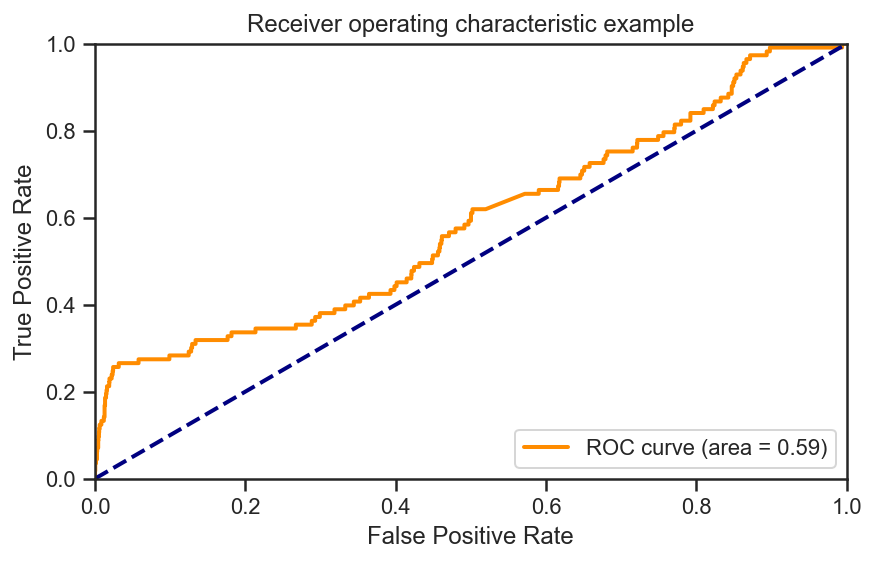

In [159]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

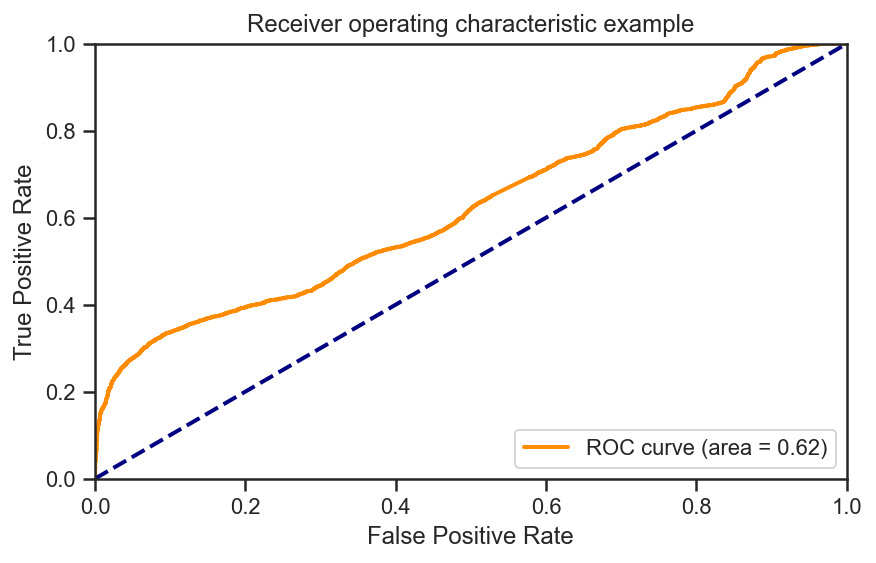

In [160]:
#Calculating accuracy, precision, recall and F1 scores for support vachine machine classification using training data
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_train, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [161]:
#Importing one versus rest classifier for support vector machine classification using training data
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[1 0 1 ... 1 1 1]


In [162]:
#Confusion matrix for one versus rest classifier for support vector machine classification using test data
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 879 2194]
 [  28   85]]


In [163]:
#Calculating accuracy, precision, recall and F1 scores for support vachine machine classification using test data
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2']))


Accuracy: 0.30

Micro Precision: 0.30
Micro Recall: 0.30
Micro F1-score: 0.30

Macro Precision: 0.50
Macro Recall: 0.52
Macro F1-score: 0.26

Weighted Precision: 0.94
Weighted Recall: 0.30
Weighted F1-score: 0.43

Classification Report

              precision    recall  f1-score   support

     Class 1       0.97      0.29      0.44      3073
     Class 2       0.04      0.75      0.07       113

    accuracy                           0.30      3186
   macro avg       0.50      0.52      0.26      3186
weighted avg       0.94      0.30      0.43      3186



In [164]:
#importing all libraries, support vector machine and navie bayesian classifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Accuracy is:  0.9560577526679221
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3073
           1       0.44      0.81      0.57       113

    accuracy                           0.96      3186
   macro avg       0.71      0.88      0.77      3186
weighted avg       0.97      0.96      0.96      3186



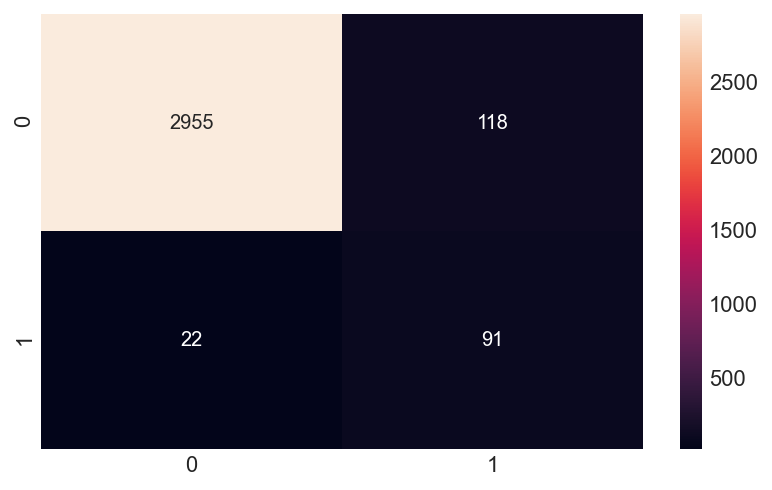

In [165]:
#Calculating precision, recall, f1-score and accuracy for naive bayesian classifier through training and test data with the variables listed below.
target_col = 'Goal Kicker'
feature_cols = ['Forward Player', 'Marks Inside 50', 'Contested Marks']
X = data[feature_cols]
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)

#Predict Score 
y_pred = model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

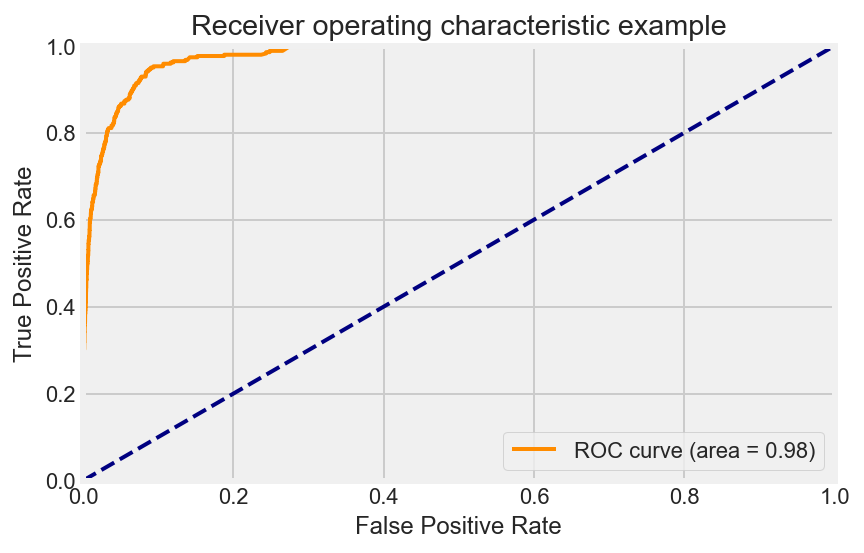

In [166]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_train, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

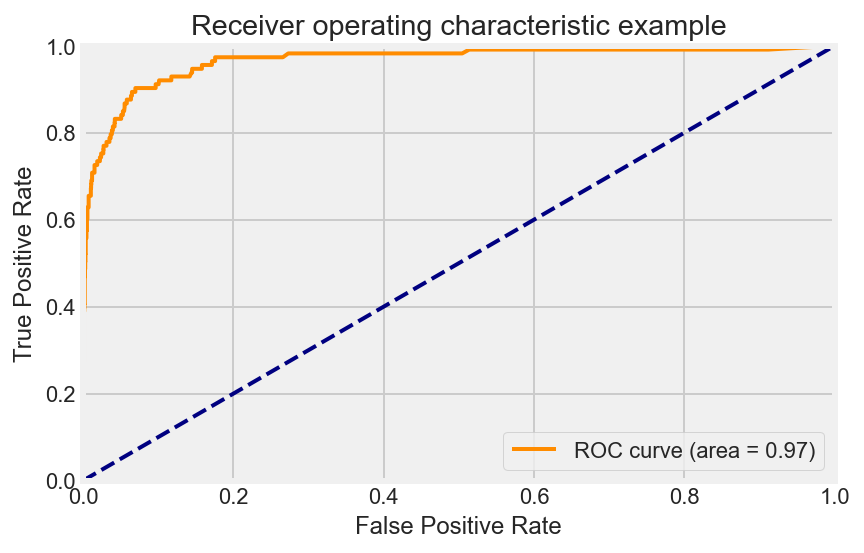

In [167]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [168]:
y = data['Goal Kicker']

In [169]:
y

0        0
1        0
2        0
3        0
4        0
        ..
12736    0
12737    0
12738    0
12739    0
12740    0
Name: Goal Kicker, Length: 12741, dtype: int64

In [170]:
x.head()

,Year,Games,Kicks,Marks,Handballs,Disposals,Goals,Behinds,Hit Outs,Tackles,...,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,Forward Player,Goal Kicker,Players_coded,Team_coded,Position_coded
0,1999,26,13.46,2.62,12.31,25.77,0.54,0.19,0.23,3.81,...,0.27,0.50,1.50,0.04,0.3,0,0,1717,2,7
1,1999,22,17.64,4.64,11.45,29.09,0.64,0.41,0.05,1.59,...,0.41,0.41,2.14,1.59,0.3,0,0,436,9,7
2,1999,23,15.30,4.26,12.35,27.65,0.78,0.48,0.35,1.13,...,0.35,0.65,0.87,1.05,0.3,0,0,437,16,7
3,1999,26,16.54,3.69,7.54,24.08,0.35,0.42,0.15,1.35,...,0.42,0.50,1.77,1.96,0.3,0,0,210,2,7
4,1999,25,17.08,3.84,7.80,24.88,1.28,0.80,0.04,1.92,...,0.40,0.72,1.20,0.64,0.3,0,0,129,10,7


In [171]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [172]:
from imblearn.over_sampling import SMOTE

In [173]:
oversample = SMOTE()

In [174]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [175]:
#Application of decision tree classifcation
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [176]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [177]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


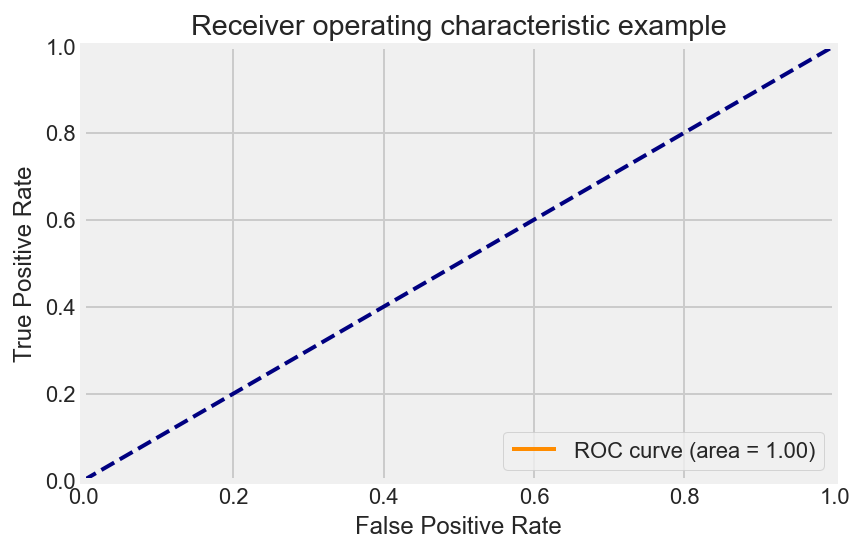

In [178]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = clf.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

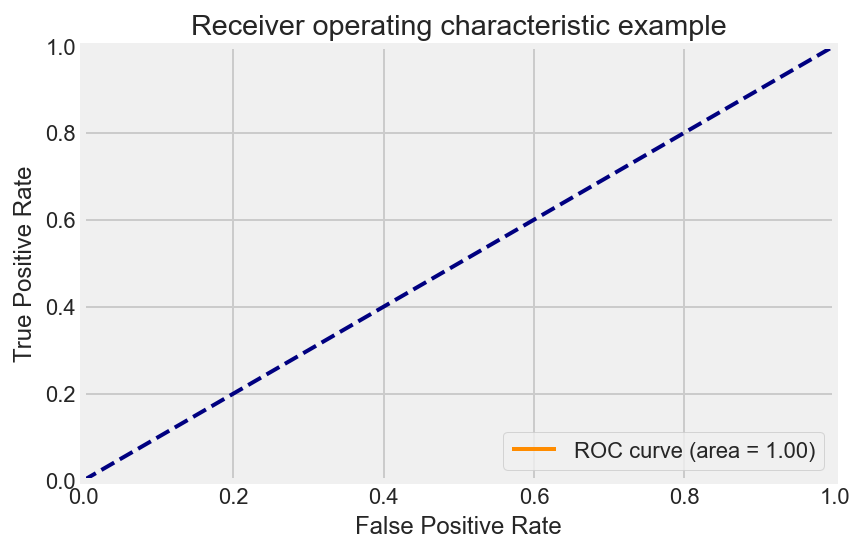

In [179]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = clf.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_train, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [180]:
#Calculating precision, recall, f1 score and accuracy for test data using decision tree classification
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2']))


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00

Classification Report

              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00      3073
     Class 2       1.00      1.00      1.00       113

    accuracy                           1.00      3186
   macro avg       1.00      1.00      1.00      3186
weighted avg       1.00      1.00      1.00      3186



In [223]:
from sklearn.model_selection import train_test_split 

In [224]:
X = data.drop('Goal Kicker',axis=1)
y = data['Goal Kicker']
X = data.copy()
X.loc[:, 'Goal Assists'] = X['Goal Assists'].fillna(Xs['Goal Assists'].median())
X.loc[:, 'Disposals'] = X['Disposals'].fillna(Xs['Disposals'].median())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [225]:
y.isnull().sum()

0

In [226]:
X.isnull().sum()

Year                       0
Games                      0
Kicks                      0
Marks                      0
Handballs                  0
Disposals                  0
Goals                      0
Behinds                    0
Hit Outs                   0
Tackles                    0
Rebound 50s                0
Inside 50s                 0
Clearances                 0
Clangers                   0
Free Kicks For             0
Free Kicks Against         0
Brownlow Votes             0
Contested Possessions      0
Uncontested Possessions    0
Contested Marks            0
Marks Inside 50            0
One Percenters             0
Bounces                    0
Goal Assists               0
Forward Player             0
Goal Kicker                0
Players_coded              0
Team_coded                 0
Position_coded             0
dtype: int64

In [227]:
#Decision tree classification codes are below
from sklearn.tree import DecisionTreeClassifier

In [228]:
dtree =DecisionTreeClassifier()

In [229]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [230]:
predict = dtree.predict(X_test)

In [231]:
from sklearn.metrics import confusion_matrix,classification_report

In [232]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3700
           1       1.00      1.00      1.00       123

    accuracy                           1.00      3823
   macro avg       1.00      1.00      1.00      3823
weighted avg       1.00      1.00      1.00      3823



In [233]:
print(confusion_matrix(y_test,predict))

[[3700    0]
 [   0  123]]


In [234]:
#Random forest classification codes are below
from sklearn.ensemble import RandomForestClassifier

In [235]:
rfc= RandomForestClassifier(n_estimators=600)

In [236]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [237]:
predict_rfc= rfc.predict(X_test)

In [238]:
print(classification_report(y_test,predict_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3700
           1       1.00      1.00      1.00       123

    accuracy                           1.00      3823
   macro avg       1.00      1.00      1.00      3823
weighted avg       1.00      1.00      1.00      3823



In [239]:
print(confusion_matrix(y_test,predict_rfc))

[[3700    0]
 [   0  123]]


In [240]:
rfc.fit(X_test,y_test)

RandomForestClassifier(n_estimators=600)

In [241]:
predict_rfc= rfc.predict(X_test)

In [242]:
print(classification_report(y_test,predict_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3700
           1       1.00      1.00      1.00       123

    accuracy                           1.00      3823
   macro avg       1.00      1.00      1.00      3823
weighted avg       1.00      1.00      1.00      3823



In [243]:
print(confusion_matrix(y_test,predict_rfc))

[[3700    0]
 [   0  123]]


In [244]:
# Import libraries
## Import Libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import seaborn as sns
sns.set(style = 'ticks')

In [245]:
import pandas as pd
import numpy as np

In [246]:
#data = pd.read_csv('C:\Users\Owner\Desktop\Data Science labs\Mini Project 1\Data set\World_Cup_Matches.csv')
data = pd.read_csv('C:\\Users\\WIN\\Desktop\\Data Science labs\\Capstone Project\\Data\\combined.csv')
print(data)

       Year              Player            Players Team  Games  Kicks  Marks  \
0      1999       Ratten, Brett       Brett Ratten   CA     26  13.46   2.62   
1      1999     Crawford, Shane     Shane Crawford   HW     22  17.64   4.64   
2      1999    Cresswell, Daryn    Daryn Cresswell   SY     23  15.30   4.26   
3      1999      Bradley, Craig      Craig Bradley   CA     26  16.54   3.69   
4      1999         Bell, Peter         Peter Bell   KA     25  17.08   3.84   
...     ...                 ...                ...  ...    ...    ...    ...   
12736  2019   McInerney, Justin   Justin McInerney   SY      1   1.00   0.00   
12737  2019  Vickers-Willis, Ed  Ed Vickers-Willis   NM      1   0.00   0.00   
12738  2019       Sheridan, Tom       Tom Sheridan   GW      1   0.00   1.00   
12739  2019        Ward, Callan        Callan Ward   GW      1   1.00   0.00   
12740  2019         Mutch, Kobe         Kobe Mutch   ES      1   0.00   0.00   

       Handballs Disposals  Goals  ... 

In [247]:
# Converting variable goal assists to float.
for x in data['Goal Assists'].unique():
    try:
        float(x)
    except:
        print([x])
data['Goal Assists'] = data['Goal Assists'].apply(lambda x : np.nan if x == "\xa0" else x).astype('float')
data.info()

['\xa0']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     12741 non-null  int64  
 1   Player                   12741 non-null  object 
 2   Players                  12741 non-null  object 
 3   Team                     12741 non-null  object 
 4   Games                    12741 non-null  int64  
 5   Kicks                    12741 non-null  float64
 6   Marks                    12741 non-null  float64
 7   Handballs                12741 non-null  float64
 8   Disposals                12741 non-null  object 
 9   Goals                    12741 non-null  float64
 10  Behinds                  12741 non-null  float64
 11  Hit Outs                 12741 non-null  float64
 12  Tackles                  12741 non-null  float64
 13  Rebound 50s              12741 non-null  float64
 14  Inside 50s   

In [248]:
# Converting variable Disposals to float.
for x in data['Disposals'].unique():
    try:
        float(x)
    except:
        print([x])
data['Disposals'] = data['Disposals'].apply(lambda x : np.nan if x == "\xa0" else x).astype('float')
data.info()

['\xa0']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     12741 non-null  int64  
 1   Player                   12741 non-null  object 
 2   Players                  12741 non-null  object 
 3   Team                     12741 non-null  object 
 4   Games                    12741 non-null  int64  
 5   Kicks                    12741 non-null  float64
 6   Marks                    12741 non-null  float64
 7   Handballs                12741 non-null  float64
 8   Disposals                12730 non-null  float64
 9   Goals                    12741 non-null  float64
 10  Behinds                  12741 non-null  float64
 11  Hit Outs                 12741 non-null  float64
 12  Tackles                  12741 non-null  float64
 13  Rebound 50s              12741 non-null  float64
 14  Inside 50s   

In [249]:
data.head()

,Year,Player,Players,Team,Games,Kicks,Marks,Handballs,Disposals,Goals,...,Contested Possessions,Uncontested Possessions,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,Position,Forward Player,Goal Kicker
0,1999,"Ratten, Brett",Brett Ratten,CA,26,13.46,2.62,12.31,25.77,0.54,...,12.85,13.46,0.27,0.50,1.50,0.04,NaN,Utility,0,0
1,1999,"Crawford, Shane",Shane Crawford,HW,22,17.64,4.64,11.45,29.09,0.64,...,11.68,16.09,0.41,0.41,2.14,1.59,NaN,Utility,0,0
2,1999,"Cresswell, Daryn",Daryn Cresswell,SY,23,15.30,4.26,12.35,27.65,0.78,...,10.43,16.78,0.35,0.65,0.87,1.05,NaN,Utility,0,0
3,1999,"Bradley, Craig",Craig Bradley,CA,26,16.54,3.69,7.54,24.08,0.35,...,7.15,16.50,0.42,0.50,1.77,1.96,NaN,Utility,0,0
4,1999,"Bell, Peter",Peter Bell,KA,25,17.08,3.84,7.80,24.88,1.28,...,11.48,12.88,0.40,0.72,1.20,0.64,NaN,Utility,0,0


In [250]:
data.describe()

,Year,Games,Kicks,Marks,Handballs,Disposals,Goals,Behinds,Hit Outs,Tackles,...,Brownlow Votes,Contested Possessions,Uncontested Possessions,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,Forward Player,Goal Kicker
count,12741.00000,12741.000000,12741.000000,12741.000000,12741.000000,12730.000000,12741.000000,12741.000000,12741.000000,12741.000000,...,12741.000000,12741.000000,12741.000000,12741.000000,12741.000000,12741.000000,12741.000000,10481.000000,12741.000000,12741.000000
mean,2009.41025,14.062318,8.109135,3.728723,5.862523,13.983713,0.532515,0.386758,1.594150,2.325693,...,0.090815,5.307820,8.618546,0.458320,0.515626,1.880148,0.435638,0.342605,0.111294,0.035398
std,6.06611,7.538444,3.376839,1.534180,2.948993,5.509644,0.598873,0.395224,5.156898,1.308804,...,0.184866,2.348109,3.851455,0.486477,0.672557,1.493617,0.616675,0.287501,0.314509,0.184790
min,1999.00000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.00000,7.000000,5.720000,2.690000,3.800000,10.170000,0.090000,0.080000,0.000000,1.400000,...,0.000000,3.860000,5.800000,0.120000,0.080000,1.000000,0.000000,0.110000,0.000000,0.000000
50%,2010.00000,15.000000,7.860000,3.670000,5.400000,13.290000,0.350000,0.290000,0.000000,2.100000,...,0.000000,5.000000,8.220000,0.320000,0.290000,1.460000,0.220000,0.300000,0.000000,0.000000
75%,2015.00000,21.000000,10.330000,4.700000,7.430000,17.360000,0.750000,0.570000,0.250000,3.000000,...,0.110000,6.390000,11.170000,0.640000,0.670000,2.330000,0.590000,0.500000,0.000000,0.000000
max,2019.00000,26.000000,22.240000,12.000000,21.910000,35.770000,5.000000,3.520000,45.820000,10.710000,...,1.650000,17.920000,23.080000,4.000000,6.330000,13.200000,7.950000,2.000000,1.000000,1.000000


In [254]:
# Perform EDA by investigating each of the points above 
# Number of features
print('- Number of features: %d' % data.shape[1])
for c in data.columns:
    print('  - %s' % c)

# Data types
print('\n- Data types')
print(data.dtypes)

# Domains, Intervals
print('\n- Domains, Intervals')
for c in data.columns:
    x = data[c].unique()
    x.sort()
    #print('  - %-16s: min: %d, max: %d' % (c, data[c].min(), data[c].max()))
    print('    values: %s' % x)

print('\n- Nulls')
for c in data.columns:
    print('  - %-16s: Nulls: %d' % (c, data[c].isna().sum()))

- Number of features: 30
  - Year
  - Player
  - Players
  - Team
  - Games
  - Kicks
  - Marks
  - Handballs
  - Disposals
  - Goals
  - Behinds
  - Hit Outs
  - Tackles
  - Rebound 50s
  - Inside 50s
  - Clearances
  - Clangers
  - Free Kicks For
  - Free Kicks Against
  - Brownlow Votes
  - Contested Possessions
  - Uncontested Possessions
  - Contested Marks
  - Marks Inside 50
  - One Percenters
  - Bounces
  - Goal Assists
  - Position
  - Forward Player
  - Goal Kicker

- Data types
Year                         int64
Player                      object
Players                     object
Team                        object
Games                        int64
Kicks                      float64
Marks                      float64
Handballs                  float64
Disposals                  float64
Goals                      float64
Behinds                    float64
Hit Outs                   float64
Tackles                    float64
Rebound 50s                float64
Inside 50s     

In [259]:
target_col = 'Goal Kicker'
feature_cols = ['Forward Player', 'Marks Inside 50', 'Contested Marks']
X = data[feature_cols]
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify = y)

In [260]:
# Choose Decision Tree Classifier Model
model = DecisionTreeClassifier()
print(model)

DecisionTreeClassifier()


In [261]:
# Fit model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [262]:
# Evaluate model against training set
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_score(actual, prediction))
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_score(actual, prediction))
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_score(actual, prediction))
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_score(actual, probabilities[:, 1]))
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

In [263]:
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)

Accuracy : 0.9975 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9290 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9996                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


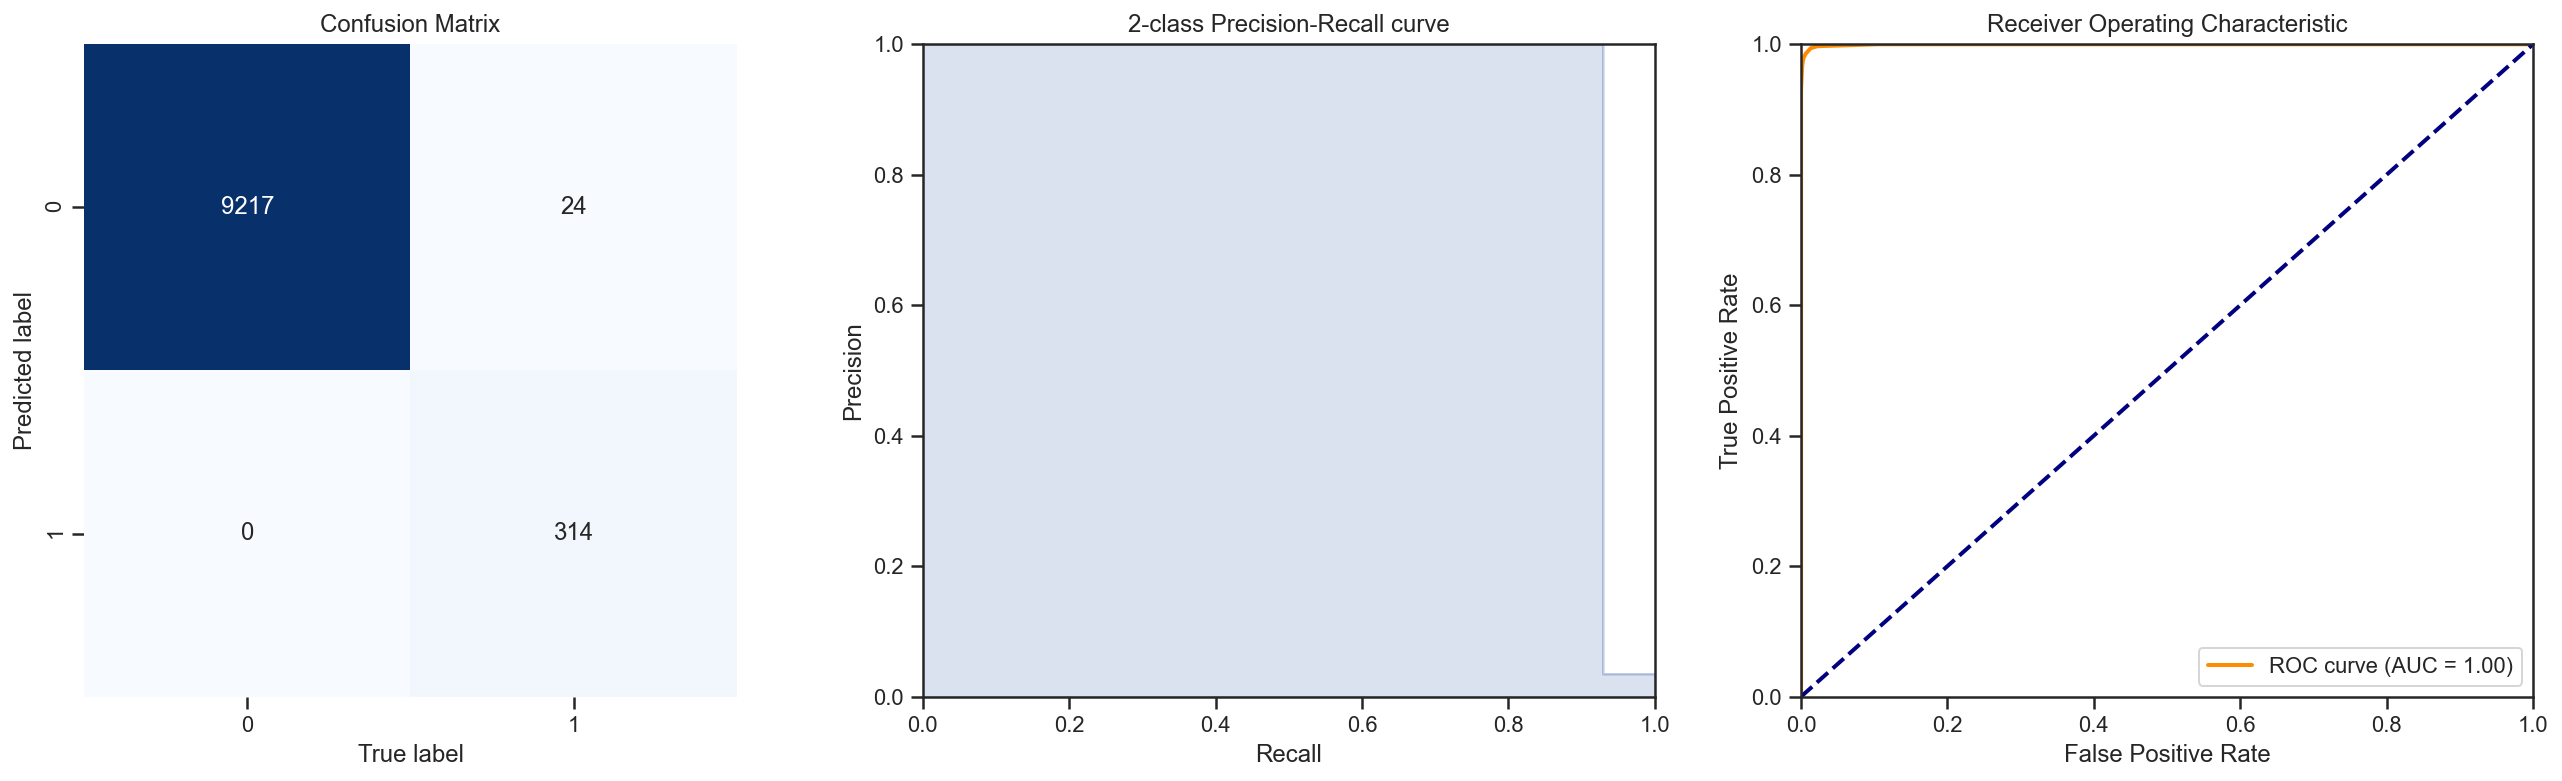

In [264]:
show_summary_report(y_train, y_train_pred, y_train_prob)

In [265]:
# Evaluate model against test set
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)

Accuracy : 0.9705 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5922 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5398 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7535                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


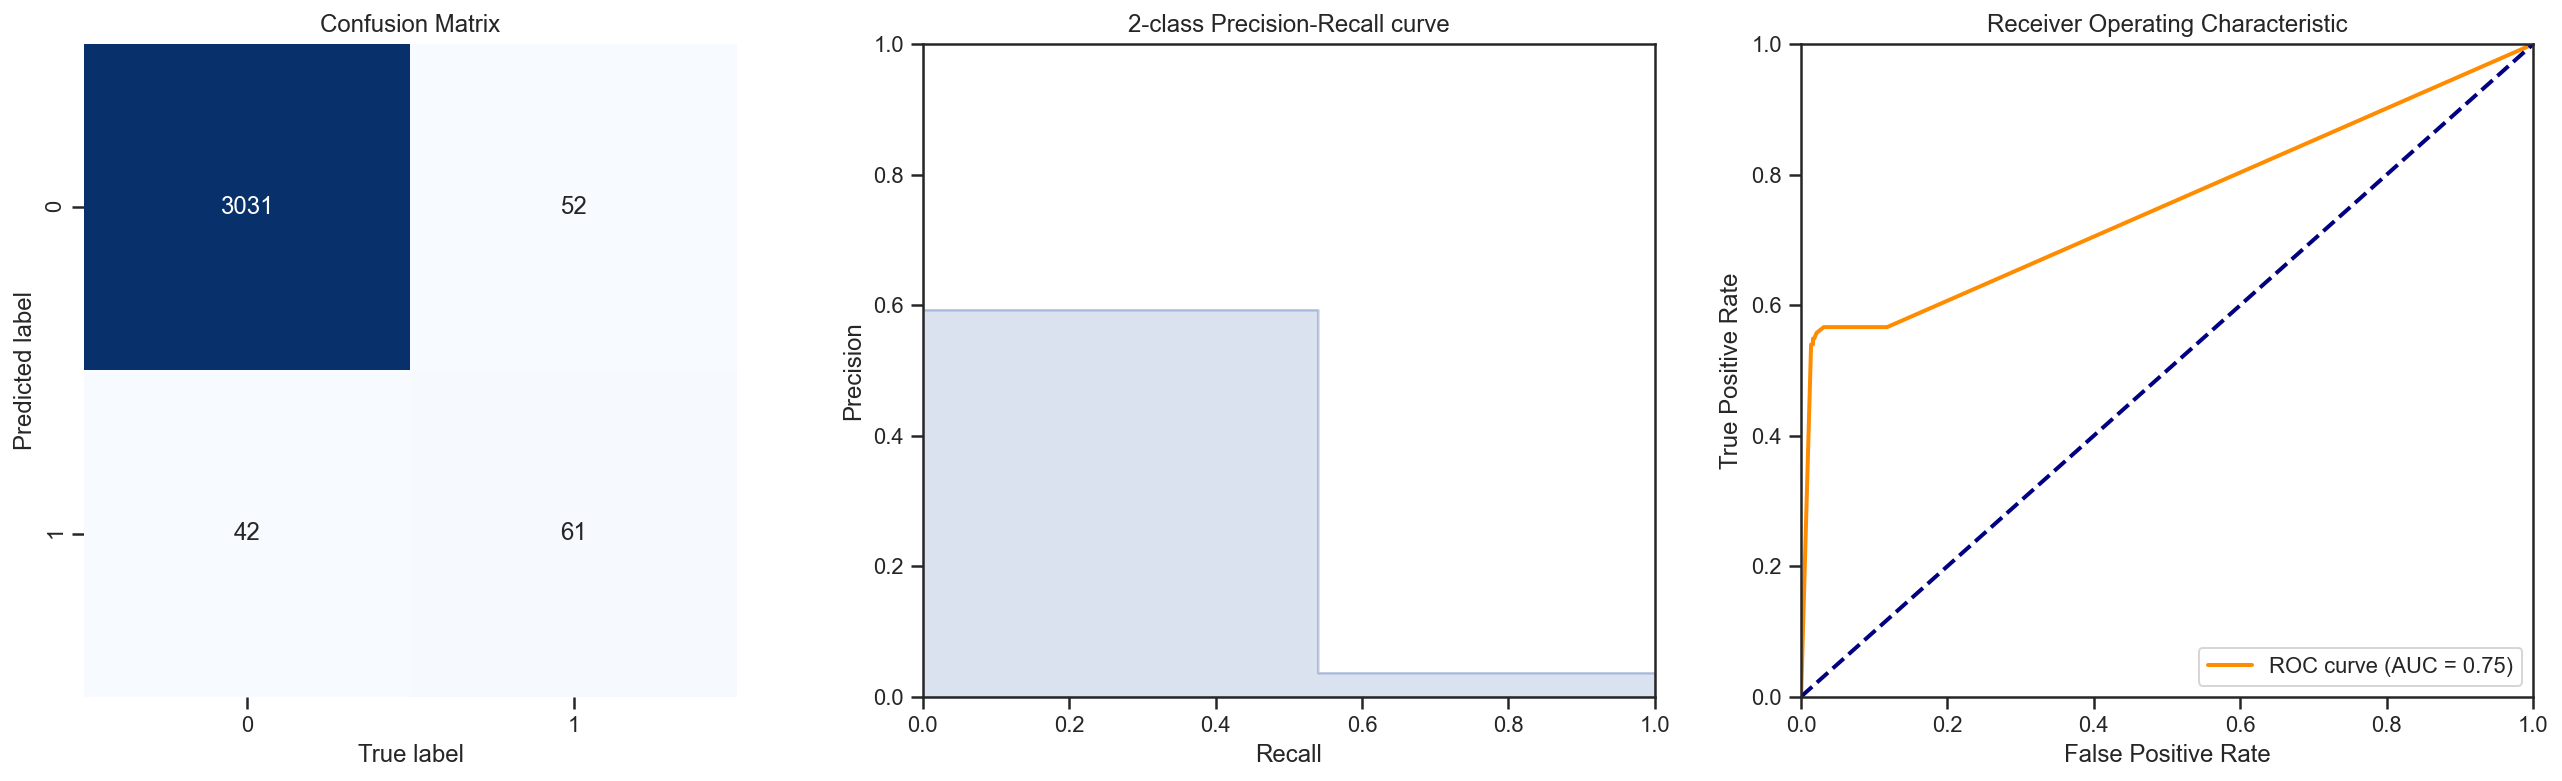

In [266]:
show_summary_report(y_test, y_test_pred, y_test_prob)

In [274]:
# Import libraries
## Import Libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import seaborn as sns
sns.set(style = 'ticks')

In [275]:
# Choose Random forest model
model = RandomForestClassifier()
print(model)

RandomForestClassifier()


In [276]:
# Fit model
model.fit(X_train, y_train)

RandomForestClassifier()

In [277]:
# Evaluate model against training set
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_score(actual, prediction))
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_score(actual, prediction))
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_score(actual, prediction))
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_score(actual, probabilities[:, 1]))
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

In [278]:
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)

Accuracy : 0.9975 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9968 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9320 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9988                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


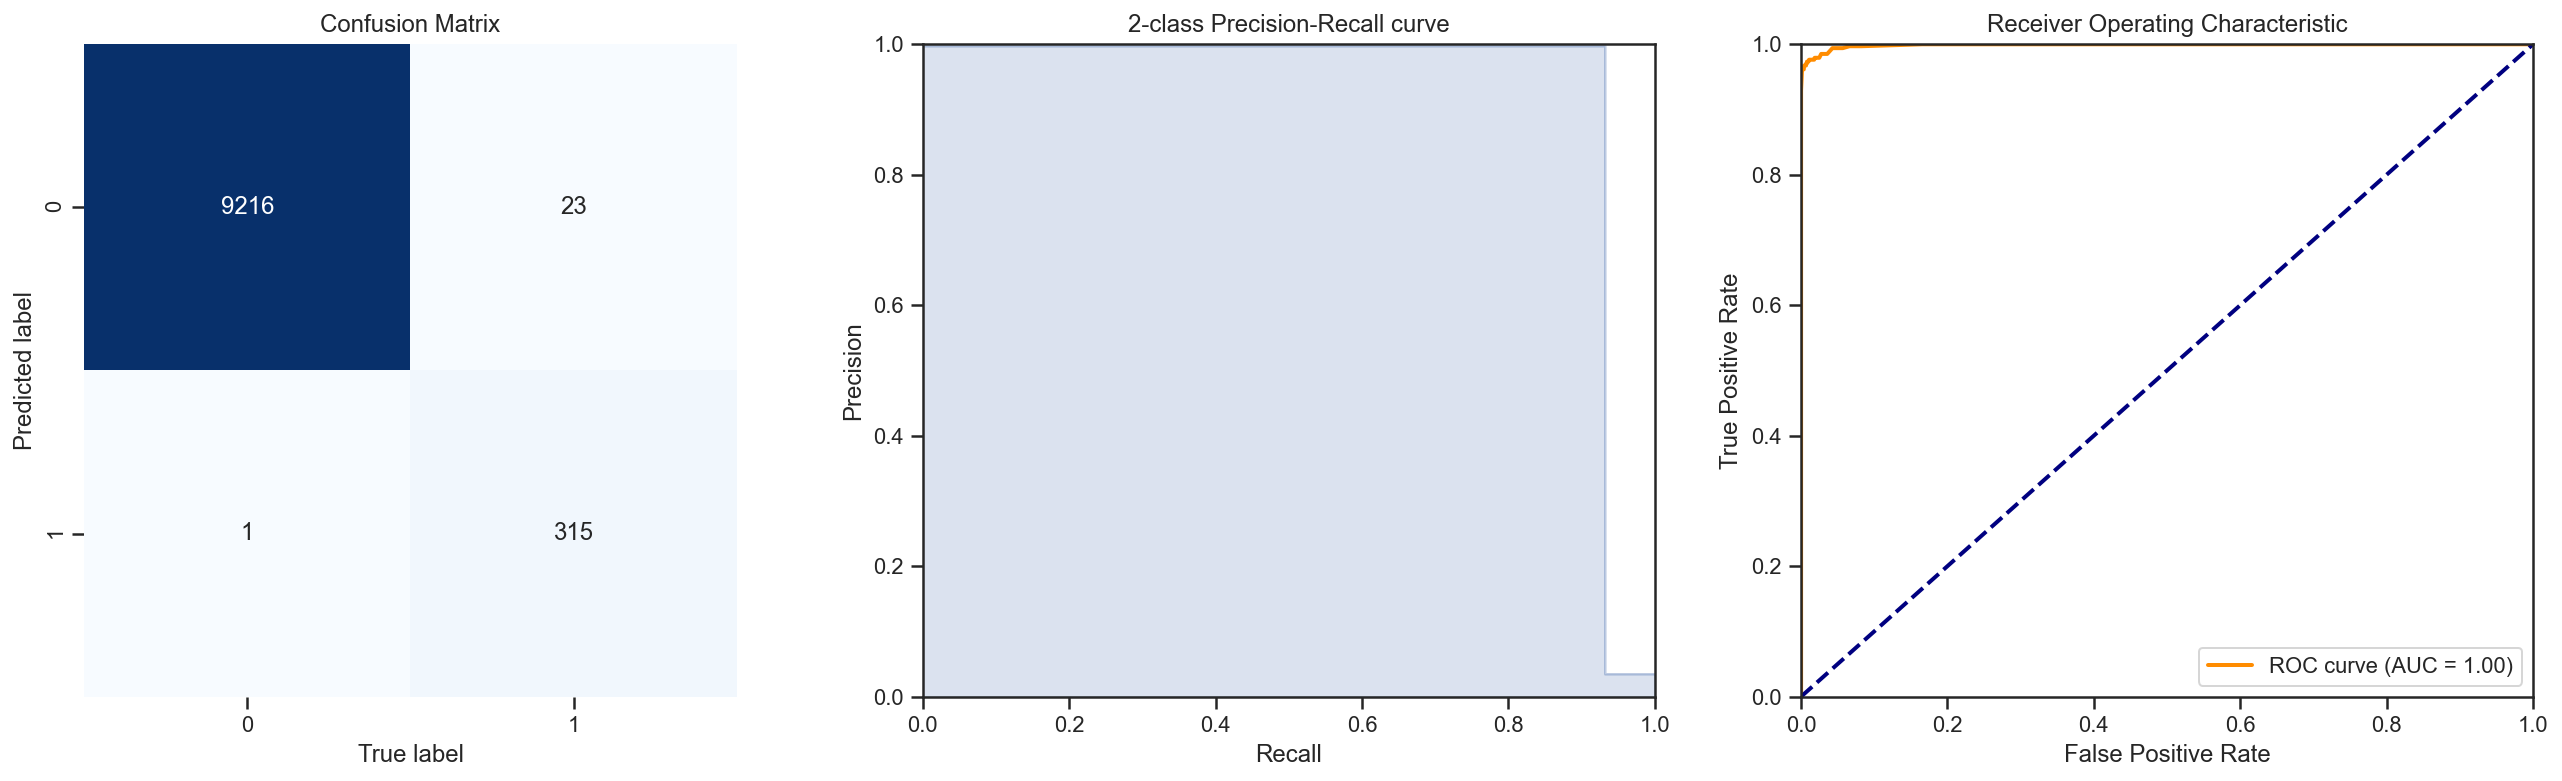

In [279]:
show_summary_report(y_train, y_train_pred, y_train_prob)

In [280]:
# Evaluate model against test set
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)

Accuracy : 0.9780 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7363 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5929 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9555                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


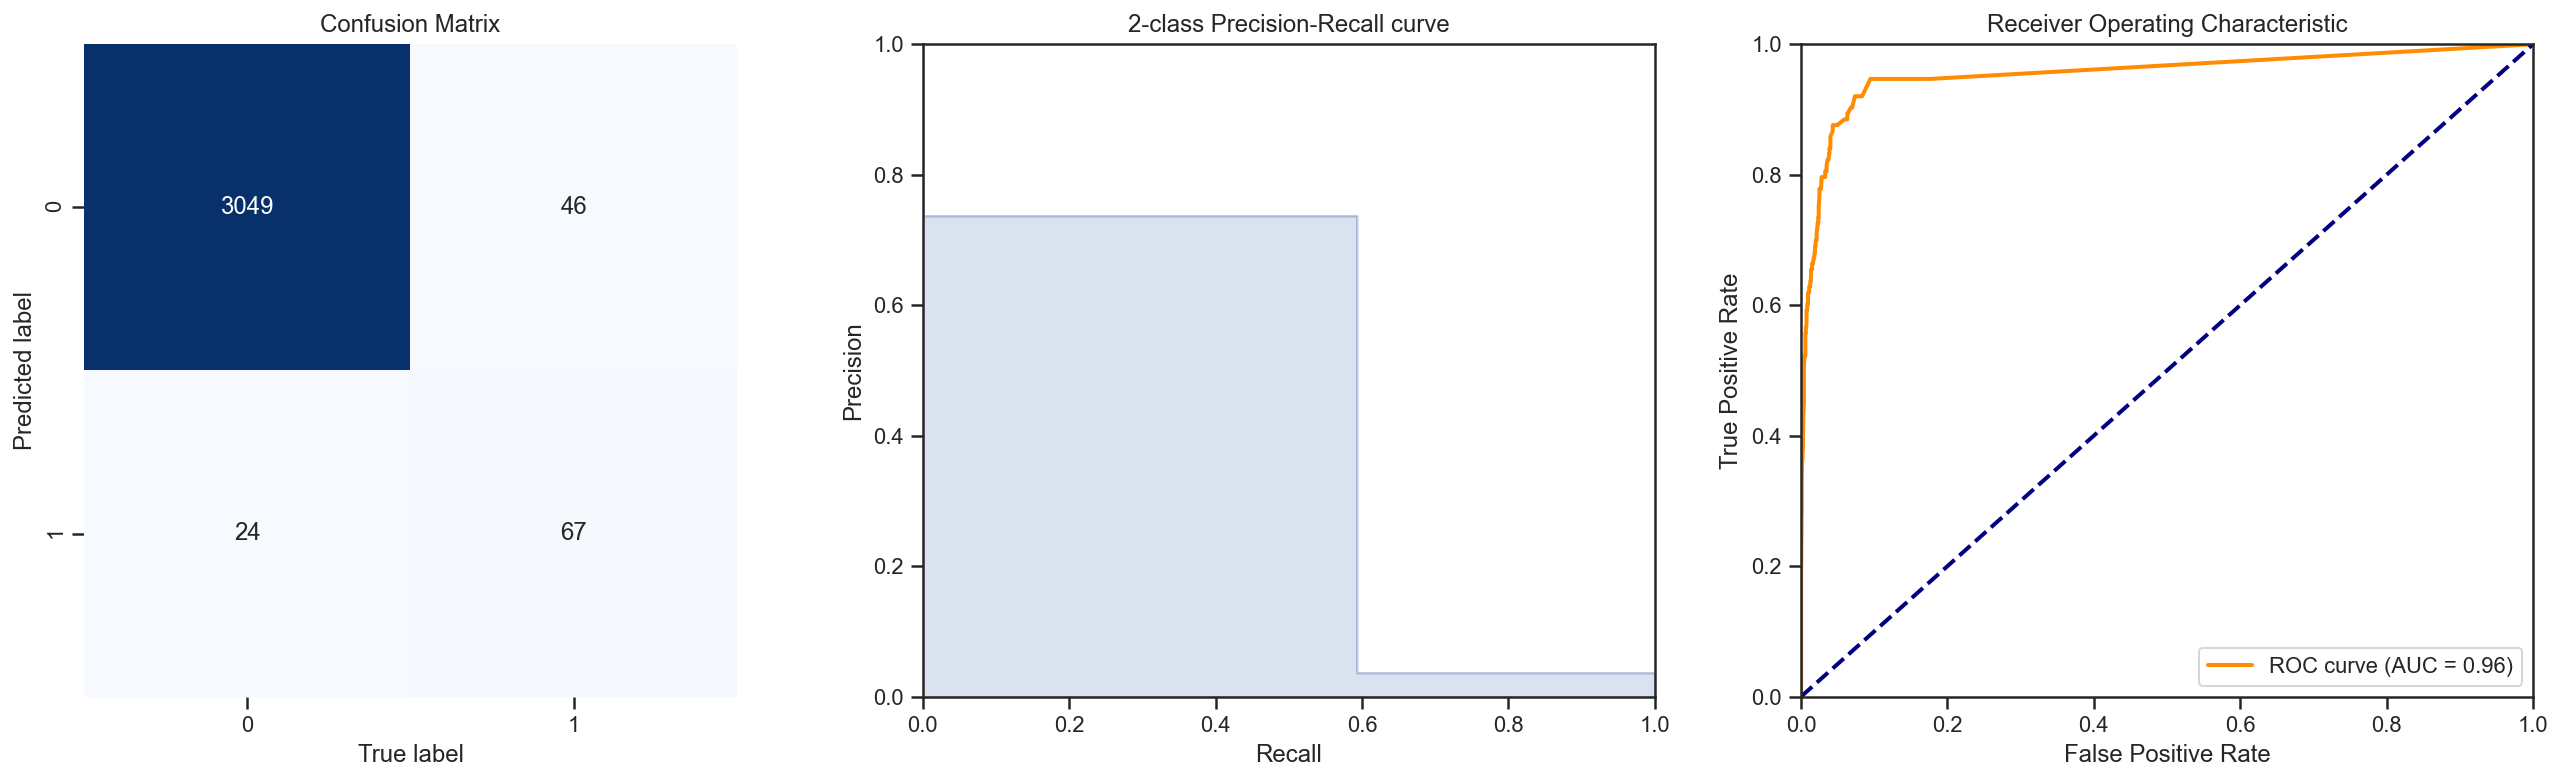

In [282]:
show_summary_report(y_test, y_test_pred, y_test_prob)

In [285]:
#Importing libraries for bagging method
## Import Libraries
import itertools

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

In [286]:
## Create training and testing subsets
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = test_size,
                                                    random_state = 100666001,
                                                    stratify = y)

In [288]:
#Applying Bagging model
kfold = KFold(n_splits = 10, random_state = 7)
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
results = cross_val_score(cart, X_train, y_train, cv = kfold)
print('Decision Tree, Cross-Validation mean: %.4f' % results.mean())

Decision Tree, Cross-Validation mean: 0.9719


In [289]:
num_trees = 100
model1 = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, random_state = 7)
model1.fit(X_train, y_train)
results = cross_val_score(model1, X_train, y_train, cv = kfold)
print('Bagging, Cross-Validation mean: %.4f' % results.mean())

Bagging, Cross-Validation mean: 0.9744


In [290]:
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, probabilities[:, 1])

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

*****************
* Decision Tree *
*****************
Accuracy : 0.9973 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9241 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9995                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


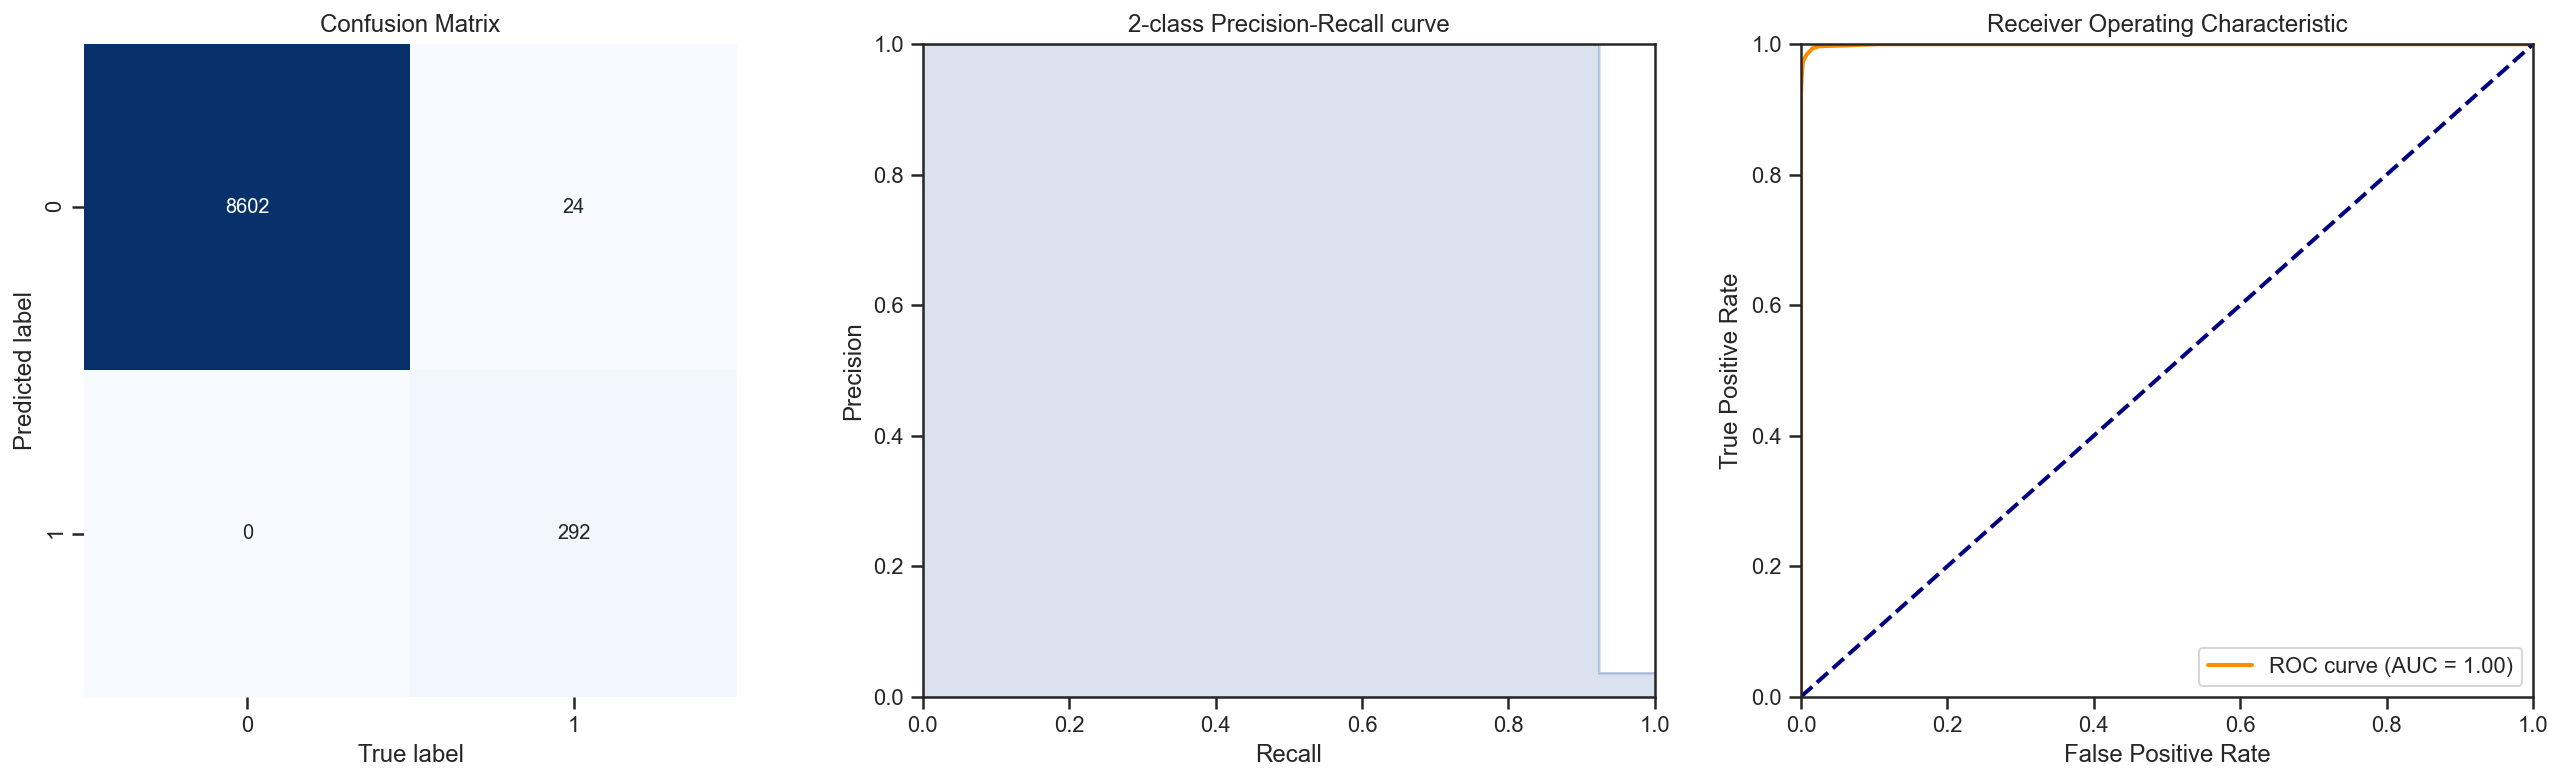


****************
* Bagging (DT) *
****************
Accuracy : 0.9973 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9966 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9272 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9986                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


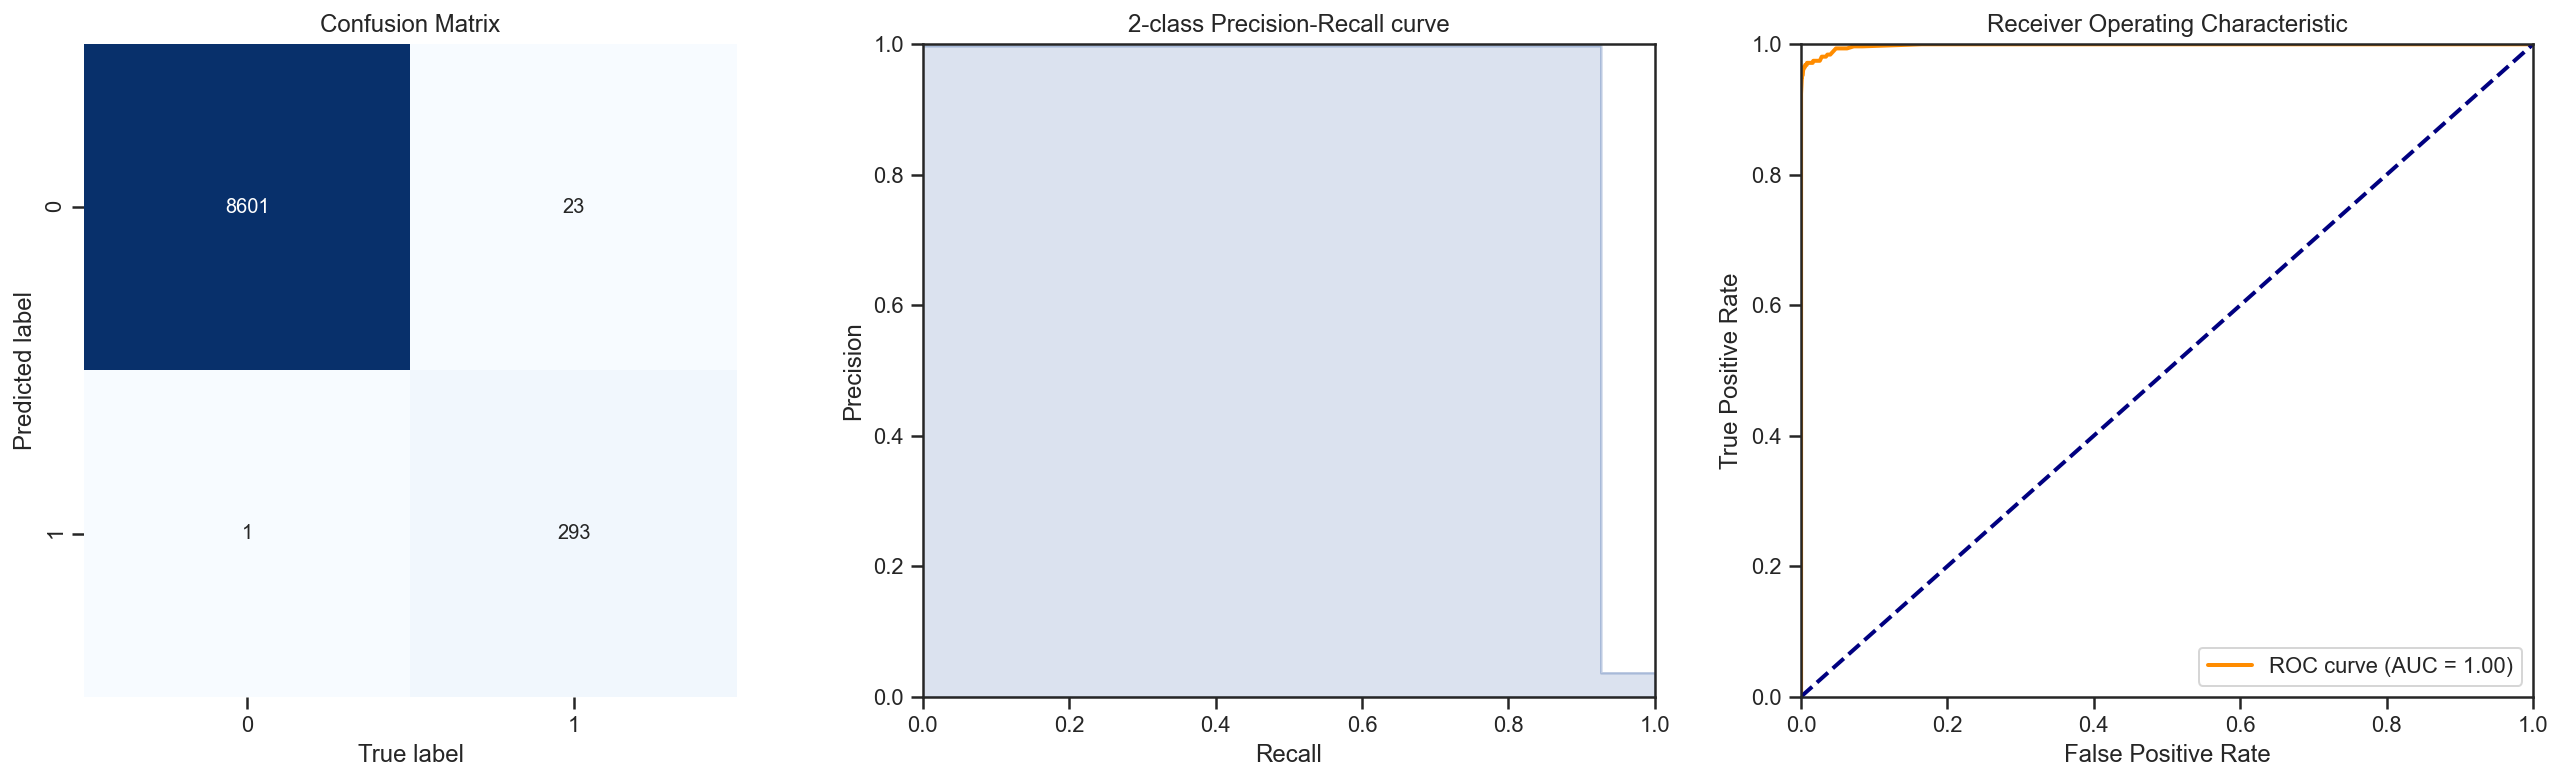

In [291]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Decision Tree', 'Bagging (DT)']
for i, m in enumerate([cart, model1]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_train)
    probabilities = m.predict_proba(X_train)
    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions, probabilities)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

In [292]:
# gbm.fit(xx_train, y_train)
predictions = model1.predict(X_test)
probabilities = model1.predict_proba(X_test)

Accuracy : 0.9749 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6345 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6815 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9666                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


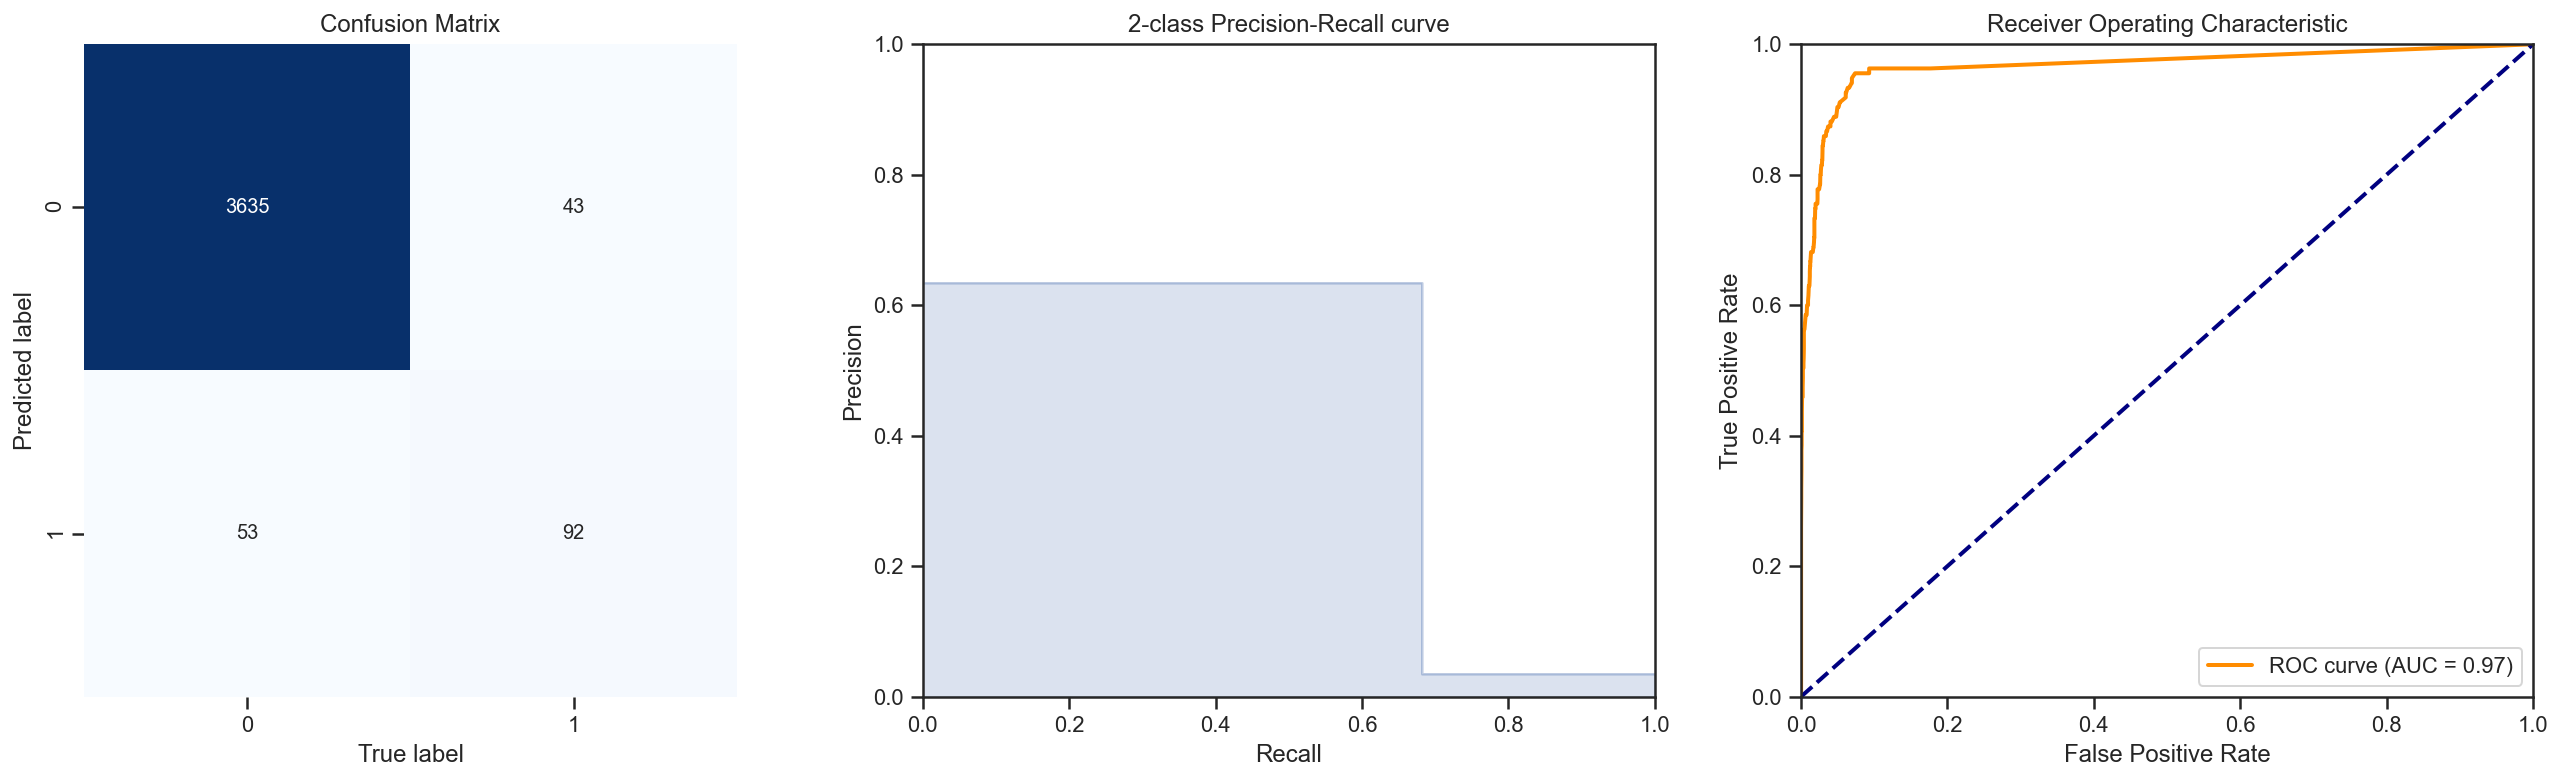

In [293]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions, probabilities)
# keep the results
results.loc[len(results)] = {
    'Model': 'Bagging (with test)', 
    'Accuracy': accuracy_, 
    'Precision': precision_,
    'Recall': recall_,
    'ROC_AUC': roc_auc_}
print()

In [294]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Decision Tree,0.997309,1.000000,0.924051,0.999517
1,Bagging (DT),0.997309,0.996599,0.927215,0.998552
2,Bagging (with test),0.974889,0.634483,0.681481,0.966640


In [296]:
#Importing libraries for boosting method
import itertools

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

In [297]:
## Create training and testing subsets
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = test_size,
                                                    random_state = 100666001,
                                                    stratify = y)

In [298]:
kfold = KFold(n_splits = 10, random_state = 7)
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
results = cross_val_score(cart, X_train, y_train, cv = kfold)
print('Decision Tree, Cross-Validation mean: %.4f' % results.mean())

Decision Tree, Cross-Validation mean: 0.9713


In [299]:
seed = 7
num_trees = 70
kfold = model_selection.KFold(n_splits = 10, random_state = seed)
model = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)
model.fit(X_train, y_train)
results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold)
print('AdaBoost, Cross-Validation mean: %.4f' % results.mean())

AdaBoost, Cross-Validation mean: 0.9768


In [300]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

*****************
* Decision Tree *
*****************
Accuracy : 0.9973 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9241 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9620                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


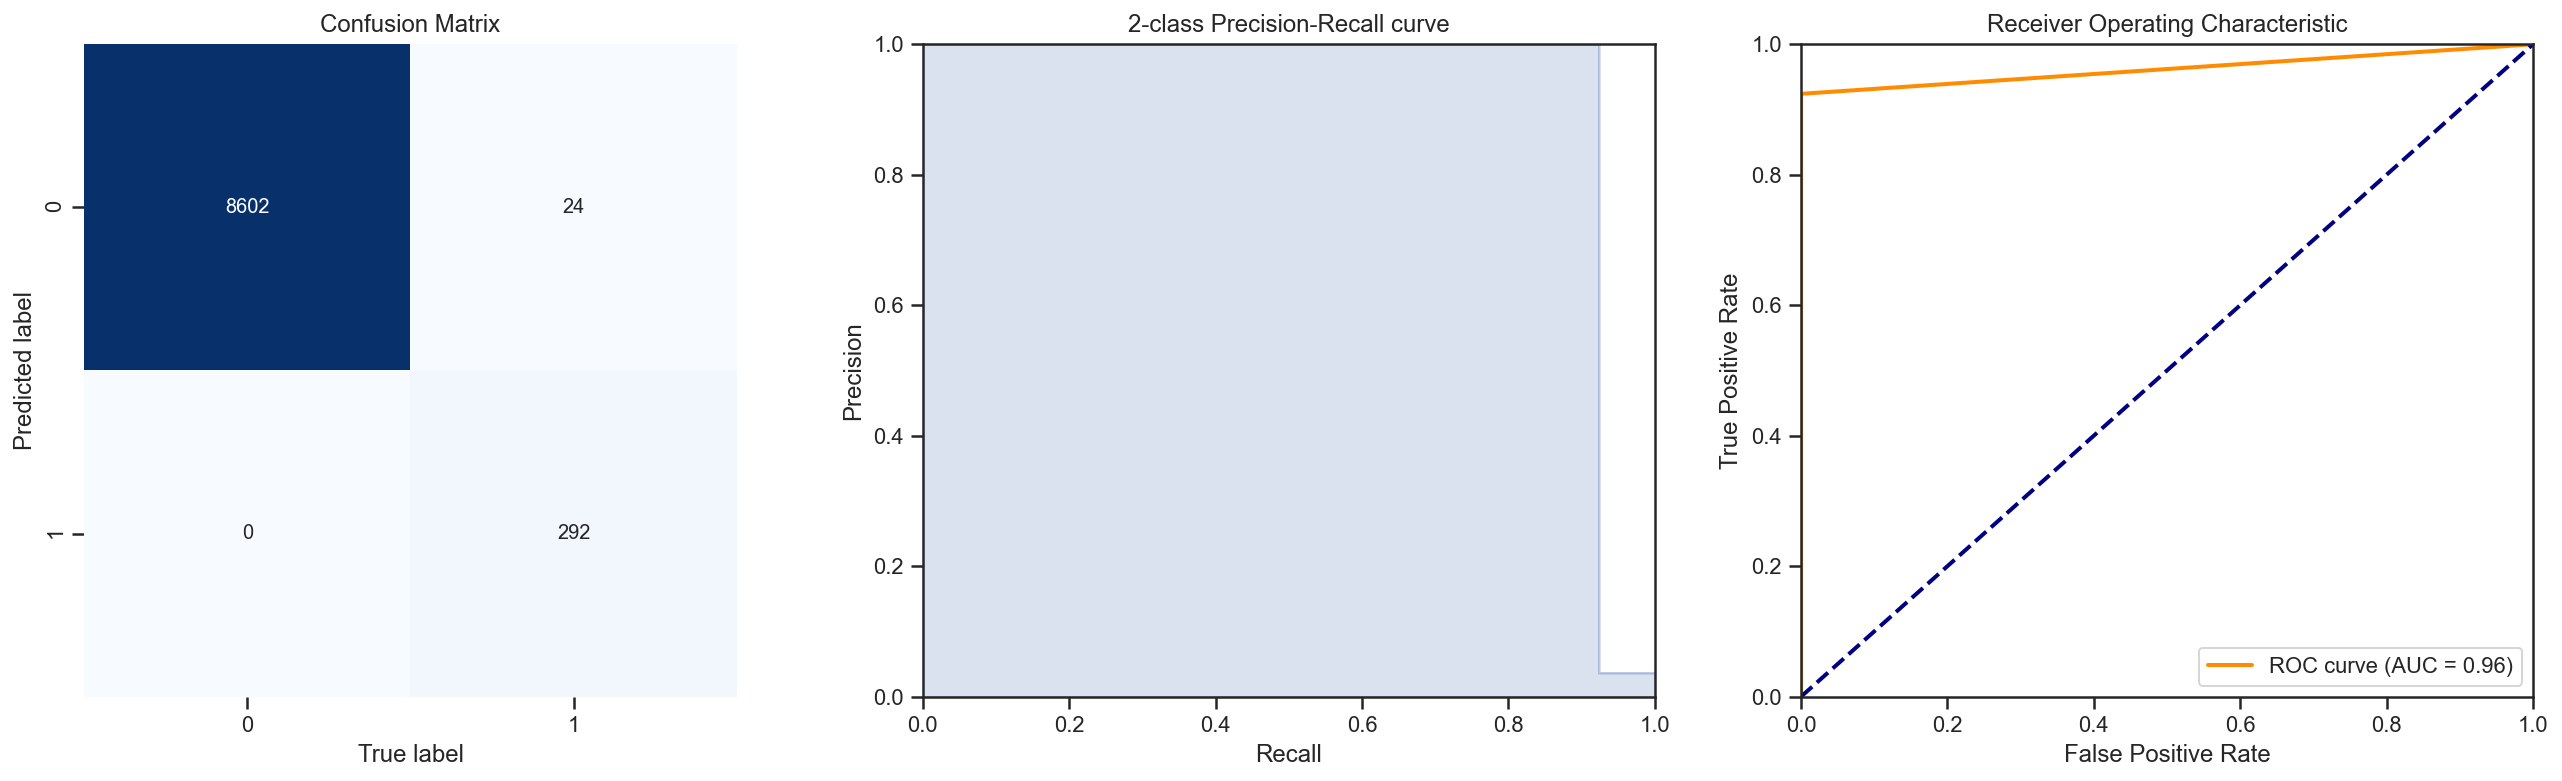


************
* AdaBoost *
************
Accuracy : 0.9790 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7699 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5823 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7879                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


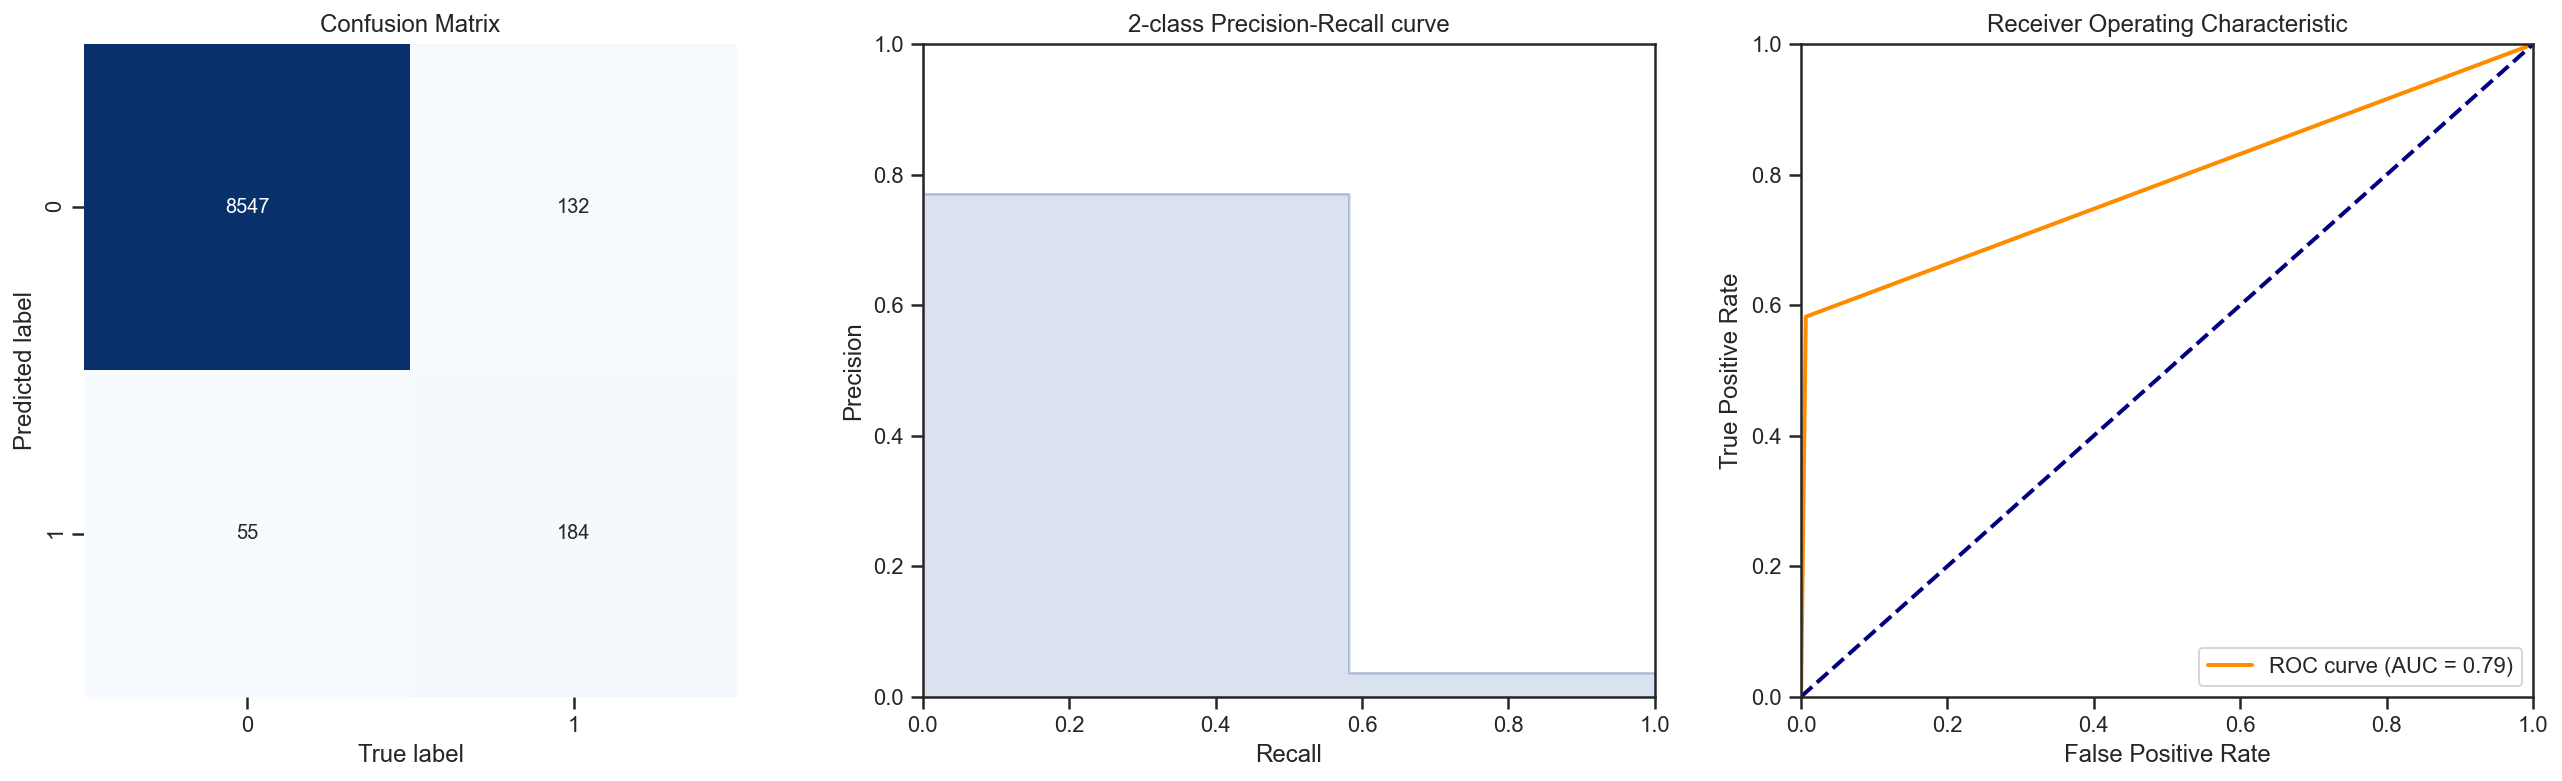

In [301]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Decision Tree', 'AdaBoost']
for i, m in enumerate([cart, model]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_train)
    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

In [302]:
# gbm.fit(xx_train, y_train)
predictions = model.predict(X_test)

Accuracy : 0.9786 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7345 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6148 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8033                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


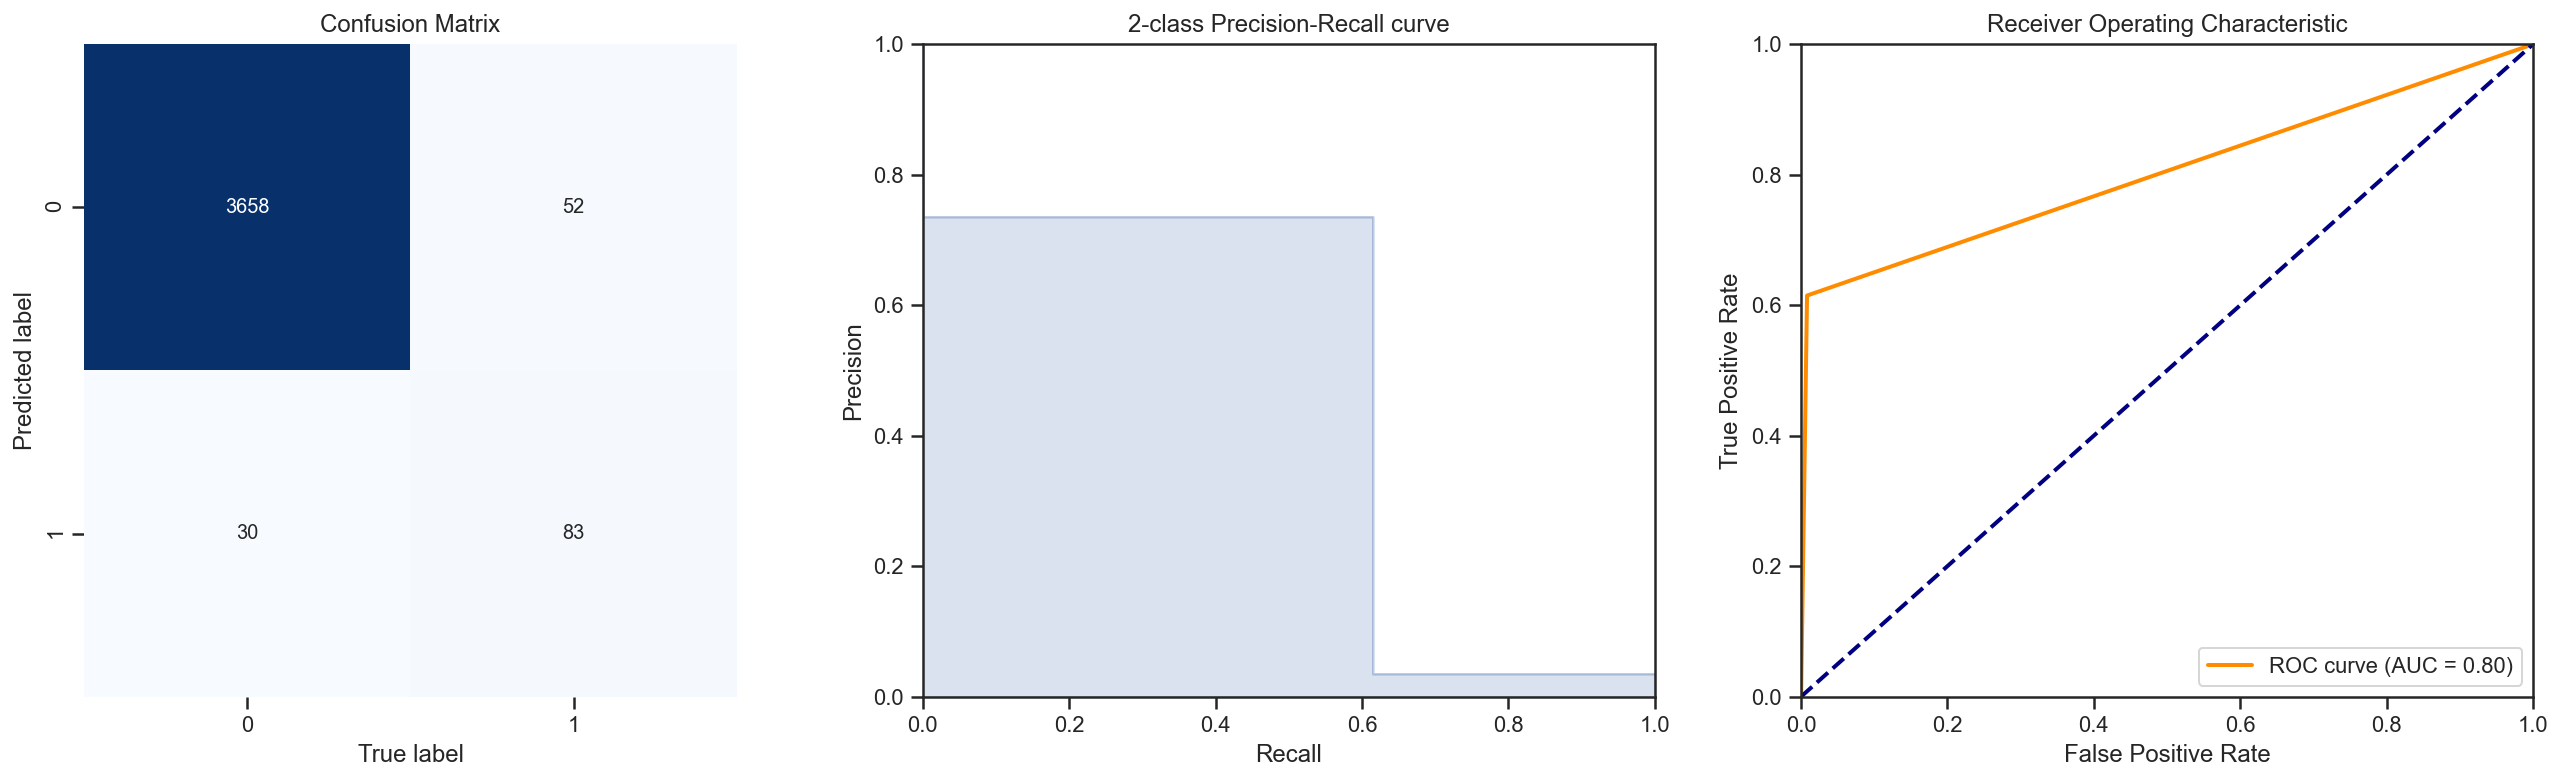

In [303]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
# keep the results
results.loc[len(results)] = {
    'Model': 'AdaBoost (with test)', 
    'Accuracy': accuracy_, 
    'Precision': precision_,
    'Recall': recall_,
    'ROC_AUC': roc_auc_}
print()

In [304]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Decision Tree,0.997309,1.000000,0.924051,0.962025
1,AdaBoost,0.979031,0.769874,0.582278,0.787942
2,AdaBoost (with test),0.978551,0.734513,0.614815,0.803340
